# ***Proyecto: Análisis Estratégico de Alojamientos en Airbnb***

# **Abstract:**

# Objetivo

Este proyecto tiene como finalidad identificar los principales factores que influyen en el éxito de los alojamientos publicados en la plataforma Airbnb. El análisis buscará optimizar la rentabilidad de los anfitriones y brindar información clave para futuras inversiones inmobiliarias vinculadas al turismo.

El mercado de alquileres temporarios ha crecido exponencialmente en los últimos años, impulsado por la demanda turística y la digitalización de las reservas. Conocer qué variables impactan en el precio, la disponibilidad y la popularidad de un alojamiento es crucial para diseñar estrategias competitivas y mejorar el desempeño económico de las propiedades.

# Dataset

El dataset Airbnb_Open_Data.csv contiene información de publicaciones activas en Airbnb, incluyendo la siguiente informacion:

***Datos del alojamiento:***

-	id: Identificador único de cada publicación en Airbnb.

-	name: Nombre que el anfitrión le dio a la publicación del alojamiento.

-	host_id: Identificador único del anfitrión (dueño o encargado de la propiedad).

-	host_name: Nombre del anfitrión que publica el alojamiento.

***Ubicación:***


-	neighbourhood_group: Agrupación de barrios o zonas.

-	neighbourhood: Barrio o área específica donde se ubica el alojamiento.

-	latitude: Coordenada de latitud del alojamiento.

-	longitude: Coordenada de longitud del alojamiento.

***Características del alojamiento:***

-	room_type: Tipo de habitación ofrecida (entera, privada, compartida).

-	price: Precio por noche de la estadía en dólares.

-	minimum_nights: Cantidad mínima de noches requeridas para reservar el alojamiento.

-	number_of_reviews: Número total de reseñas recibidas por el alojamiento.

-	last_review: Fecha de la última reseña recibida.

-	reviews_per_month: Promedio de reseñas recibidas por mes.

-	calculated_host_listings_count: Número de alojamientos que el anfitrión tiene publicados en total.

-	availability_365: Número de días en el año en los que el alojamiento está disponible para ser reservado.

# **Metodología**

-	Análisis Exploratorio de Datos (EDA): Evaluar la distribución de precios, disponibilidad y reseñas según distintos segmentos.

-	Visualizaciones estratégicas: Crear gráficos univariados, bivariados y multivariados para entender la interacción entre variables críticas.

-	Interpretación y generación de insights: Formular recomendaciones basadas en evidencia para maximizar la ocupación y optimizar precios.

# **Se espera identificar:**

-	Qué tipo de alojamiento y qué ubicaciones tienen mayor demanda.

-	Cómo afectan el precio, la cantidad de reseñas y la disponibilidad en la preferencia del cliente.

-	Estrategias de optimización de tarifas y ocupación anual.

Este análisis permitirá a propietarios y potenciales inversores diseñar estrategias de marketing, pricing y posicionamiento más efectivas en el competitivo mercado de alojamientos turísticos.


# **Hipótesis:**

-	¿Cómo varía el precio promedio de los alojamientos según el vecindario?

-	¿Qué tipo de habitación es el más popular en términos de cantidad de reseñas?

-	¿Existe alguna relación entre disponibilidad anual y precio?

-	¿Qué características tienen las propiedades mejor puntuadas?

- ¿Qué combinación de factores maximiza la rentabilidad de un alojamiento en Airbnb?

# **Librerias**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import math

**Se importaron las librerías estándar que se utilizan para trabajar con datos en Python:**

**NumPy:** Para trabajar con arrays y funciones matemáticas.

**Pandas:** Para manipulación y análisis de datos.

**Matplotlib/Seaborn:** Para la visualización de los datos.

**Missingno:** Para la visualización de valores nulos en los datos, ayudando en el análisis de datos faltantes.

**Math:** Para calcular el número de filas necesarias en la grilla de subgráficos.

# **1- Limpieza de datos y Análisis exploratorio de datos (EDA)**

# **DataSet**

In [ ]:
# URL-CVS-GitHub:
url = 'https://raw.githubusercontent.com/IturryCamila/Data-Science-Camila-Iturry/refs/heads/main/Airbnb_Open_Data.csv'

# Cargar el archivo especificando low_memory=False para evitar warnings por tipos mixtos
df = pd.read_csv(url, low_memory=False)

# 1ras 5 filas
df.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


*El parámetro low_memory=False se usa para evitar que Pandas interprete las columnas con tipos de datos mixtos de forma incorrecta.*

In [ ]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

*Se revisan las primeras 5 filas con df.head(5) y la estructura general del DataFrame con df.info(). Se puede observar cómo está organizado el dataset, qué tipo de datos hay, y si existen posibles problemas con las columnas.*

# **Duplicados**

In [ ]:
# Chequeo de Duplicados
df.duplicated().sum()

np.int64(541)

In [ ]:
# Visualizacion de Duplicados
df[df.duplicated()]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102058,35506831,Master Bedroom with private Bathroom & Balcony,55110690425,unconfirmed,UZeyir,Queens,Maspeth,40.74056,-73.90635,United States,...,$141,1.0,1.0,11/14/2021,0.27,3.0,1.0,339.0,NaN,NaN
102059,35507383,Cozy 2 br in sunny Fort Greene apt,80193772189,verified,Sally,Brooklyn,Fort Greene,40.68701,-73.97555,United States,...,$130,3.0,38.0,11/13/2021,0.27,3.0,1.0,0.0,NaN,NaN
102060,35507935,Duplex w/ Terrace @ Box House Hotel,72991962259,verified,The Box House Hotel,Brooklyn,Greenpoint,40.73756,-73.95350,United States,...,$181,3.0,10.0,11/13/2021,0.08,3.0,30.0,32.0,NaN,NaN
102061,35508488,"Cozy, clean Greenpoint room with yard access",74975156081,verified,Dawn,Brooklyn,Greenpoint,40.72516,-73.95004,United States,...,$118,30.0,38.0,11/13/2021,0.34,5.0,2.0,324.0,NaN,NaN
102062,35509040,2BR XL Loft: Cleaning CDC guidelines implemented,85844415221,unconfirmed,Vida,Brooklyn,Greenpoint,40.72732,-73.94185,United States,...,$71,30.0,13.0,11/13/2021,0.14,4.0,28.0,336.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


*Se identificaron 541 registros duplicado.*

*Sin embargo, al analizar las variables (NAME, host id, host name, neighbourhood, entre otras), se observó que los datos asociados no son idénticos.*

*Por esta razón, no se consideran duplicados reales, sino variantes legítimas dentro del dataset.*

*Conclusión: no se eliminan registros para preservar la integridad del análisis*

# **Eliminación de columna**

In [ ]:
# Eliminacion de License
df.drop(['license'], axis=1, inplace=True)

In [ ]:
# Verifición de ejecución
print(df.columns)

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules'],
      dtype='object')


*Se eliminó la columna 'license' con df.drop(['license'], axis=1, inplace=True). Ya que no es relevante para el análisis, lo que justifica su eliminación para reducir la complejidad del dataset.*

# **Datos Nulos**

In [ ]:
# Chequeo de Nulos
df.isna().sum()

,0
id,0
NAME,250
host id,0
host_identity_verified,289
host name,406
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


In [ ]:
# Porcentaje de Nulos
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

,0
house_rules,50.810437
last review,15.490404
reviews per month,15.476759
country,0.518524
availability 365,0.436651
minimum nights,0.398639
host name,0.395715
review rate number,0.317742
calculated host listings count,0.310919
host_identity_verified,0.281679


In [ ]:
# Nulos Totales
print("Datos Nulos Restantes:", df.isna().sum().sum())

Datos Nulos Restantes: 88172


*Visualizacion de Nulos*

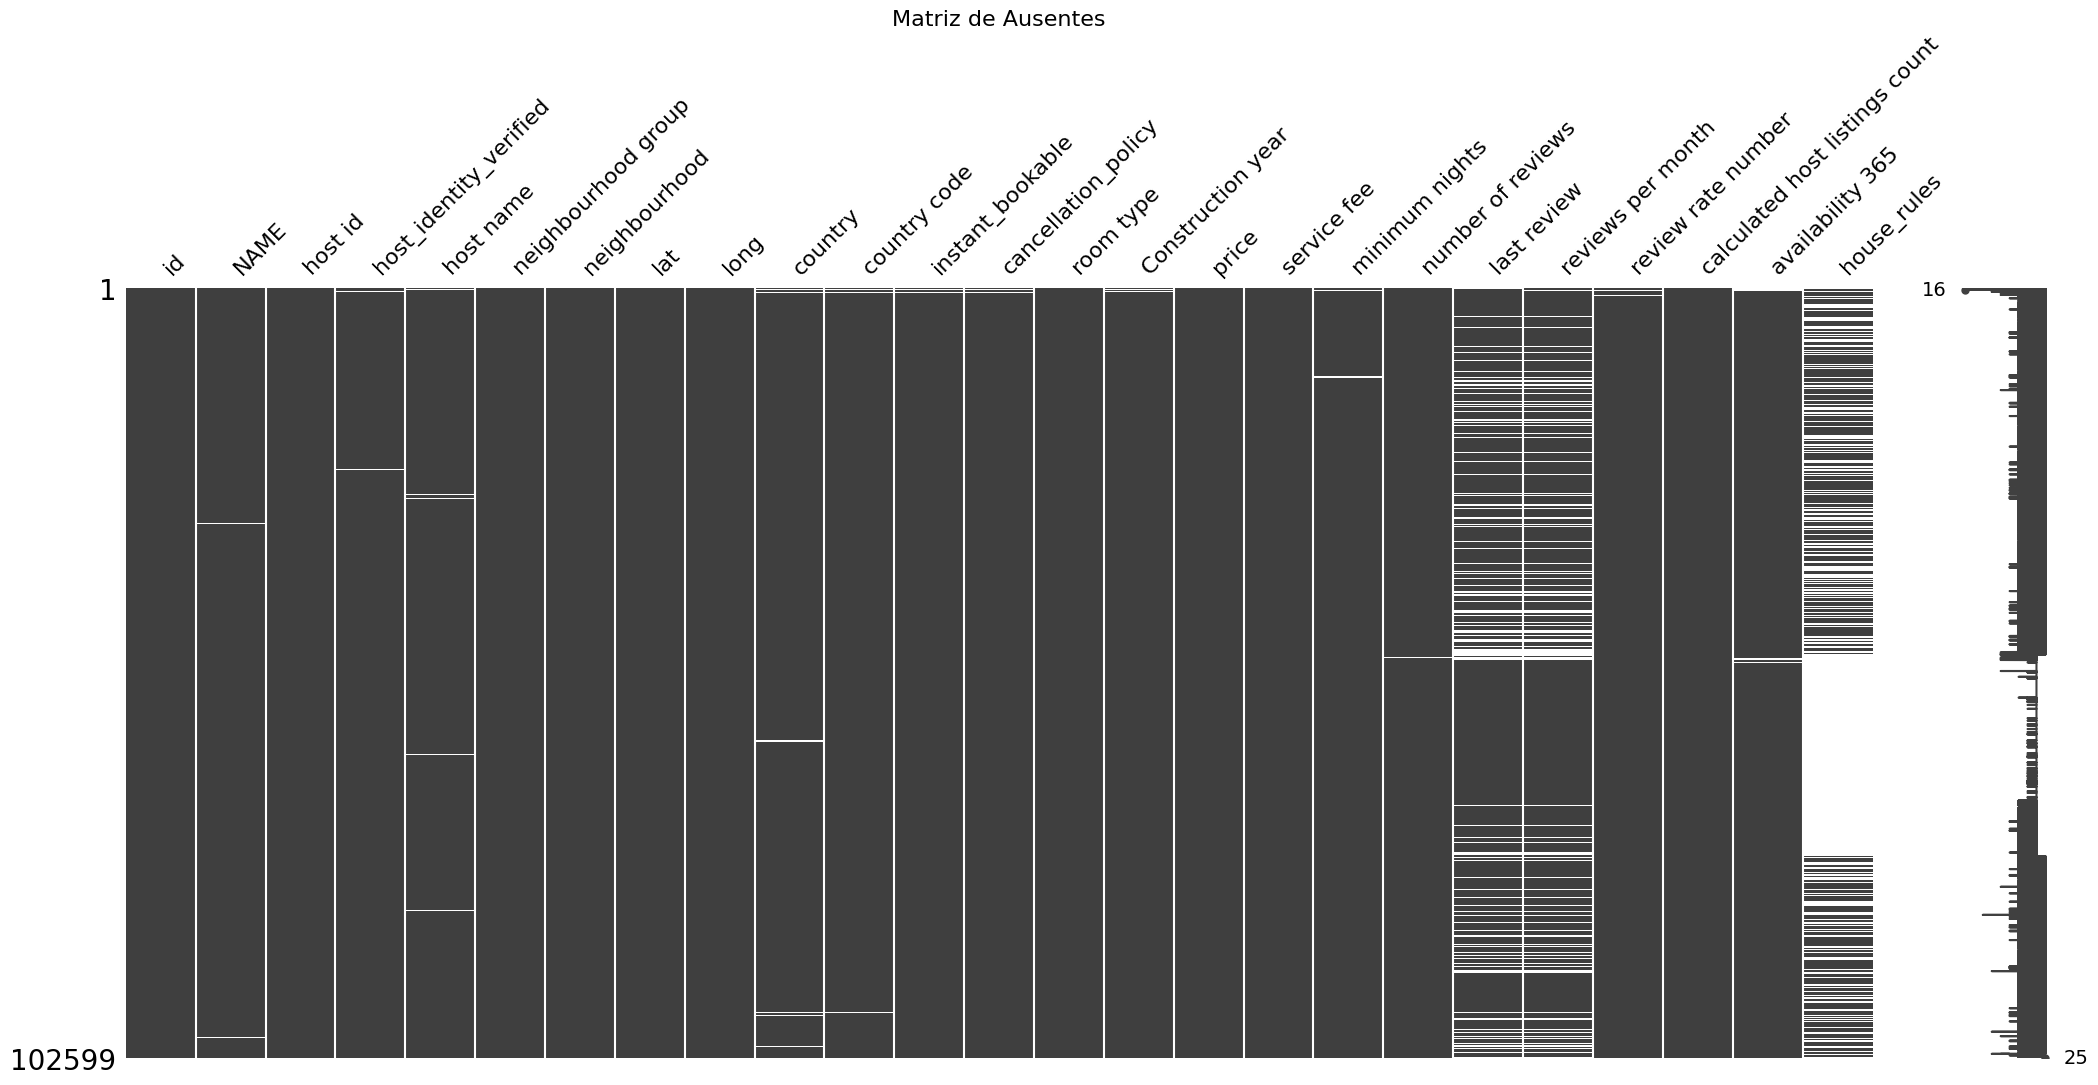

In [ ]:
# Matriz
msno.matrix(df)
plt.title('Matriz de Ausentes',fontsize=16)
plt.show()

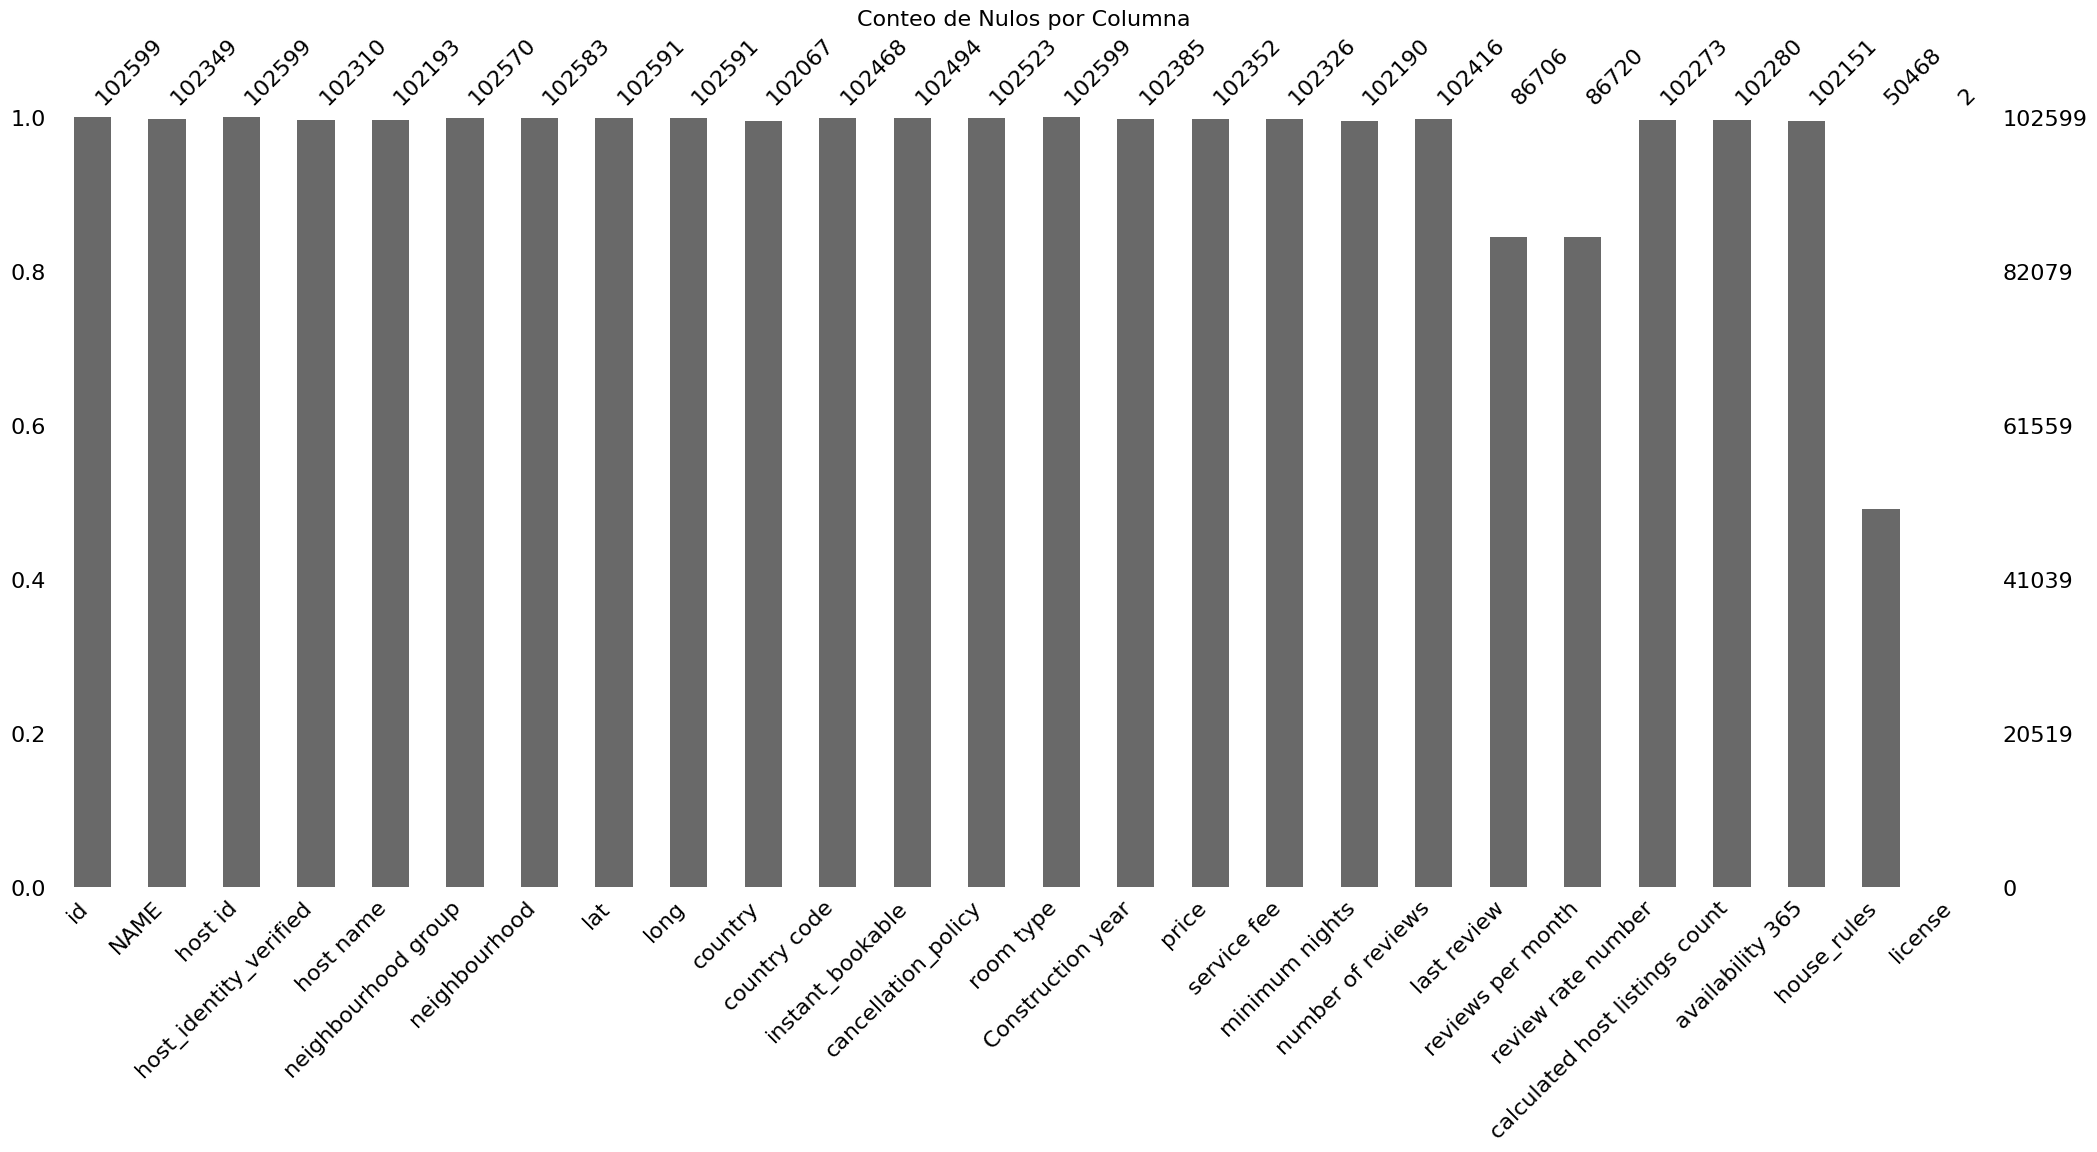

In [ ]:
# Grafico de Barras
msno.bar(df)
plt.title('Conteo de Nulos por Columna',fontsize=16)
plt.show()

# **Imputaciones**

In [ ]:
# Imputar 0 en review per month
df['reviews per month']=df['reviews per month'].fillna(0)
df['reviews per month']=df['reviews per month'].fillna(0)
df['number of reviews']=df['number of reviews'].fillna(0)
df['reviews per month']=df['reviews per month'].fillna(0)
df['review rate number']=df['review rate number'].fillna(0)
df['calculated host listings count']=df['calculated host listings count'].fillna(0)
df['lat']=df['lat'].fillna(0)
df['long']=df['long'].fillna(0)

In [ ]:
# Imputar 'No review' en last review
df['last review']=df['last review'].fillna('No review')

In [ ]:
# Imputar 'Unnamed' en NAME
df['NAME']=df['NAME'].fillna('Unnamed')
df['host name']=df['host name'].fillna('Unnamed')

In [ ]:
# Imputar 'unconfirmed' en host_identity_verified
df['host_identity_verified']=df['host_identity_verified'].fillna('unconfirmed')

In [ ]:
# Imputar 'Lacks' en country code
df['country code']=df['country code'].fillna('Lacks')

In [ ]:
# Imputar 'Unspecified' en neighbourhood group, neighbourhood, country, instant_bookable, cancellation_policy, price, service fee, house_rules
df['neighbourhood group']=df['neighbourhood group'].fillna('Unspecified')
df['neighbourhood']=df['neighbourhood'].fillna('Unspecified')
df['country']=df['country'].fillna('Unspecified')
df['instant_bookable']=df['instant_bookable'].fillna('Unspecified')
df['cancellation_policy']=df['cancellation_policy'].fillna('Unspecified')
df['price']=df['price'].fillna('Unspecified')
df['service fee']=df['service fee'].fillna('Unspecified')
df['house_rules']=df['house_rules'].fillna('Unspecified')
df['Construction year']=df['Construction year'].fillna('Unspecified')
df['minimum nights']=df['minimum nights'].fillna('Unspecified')
df['availability 365']=df['availability 365'].fillna('Unspecified')

In [ ]:
# Correccion de Nombres
correcciones = {
    'Brookln': 'Brooklyn',
    'Manhatan': 'Manhattan'
}

# Reemplazamos las variantes con las correcciones
df['neighbourhood group'] = df['neighbourhood group'].replace(correcciones)

*En el caso de los nombres de barrios que tienen errores tipográficos (por ejemplo, 'Brookln' debería ser 'Brooklyn'), se aplica un diccionario de correcciones con replace(). *

***Chequeo de Nulos***

In [ ]:
# Nulos Totales
print("Datos Nulos Restantes:", df.isna().sum().sum())

Datos Nulos Restantes: 0


*Conclusión*

*Se inspeccionaron los valores nulos con df.isna().sum() y se visualizó la presencia de valores nulos con Missingno, tanto en forma de matriz como en gráficos de barras.*

*Luego, se decide imputar valores para varias columnas, siguiendo una estrategia lógica para cada tipo de dato:*

*Para las columnas numéricas como reviews per month, number of reviews, review rate number, etc., se imputa 0.*

*Para las columnas categóricas, como last review, host name, country code, y varias otras, se imputa un valor que tiene sentido según el contexto.*

# **Limpieza de datos**

In [ ]:
# Función segura para limpiar y convertir a float
def limpiar_precio(valor):
    if isinstance(valor, str):
        valor = valor.replace('$', '').replace(',', '').strip()
        try:
            return float(valor)
        except ValueError:
            return None  # Si no puede convertirse, lo deja como NaN
    return valor

# Aplicar a las columnas de precios
df['price'] = df['price'].apply(limpiar_precio)
df['service fee'] = df['service fee'].apply(limpiar_precio)

In [ ]:
# Convertir 'last review' a tipo fecha
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

In [ ]:
#Limpieza de datos sucios en 'year'
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
df['year'] = df['last review'].dt.year
print(df['year'].sort_values().unique())
df = df[(df['year'] >= 2016) & (df['year'] <= 2025)]
print(f"Cantidad de registros después del filtrado: {df.shape[0]}")

[2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019. 2020. 2021. 2022. 2024.
 2025. 2026. 2040. 2058.   nan]
Cantidad de registros después del filtrado: 84477


*El campo 'price' y 'service fee' se limpian con una función personalizada llamada limpiar_precio(). Esta función elimina los caracteres innecesarios (como el símbolo $ y las comas) y convierte el valor en tipo numérico (float). Si el valor no puede ser convertido, se reemplaza por NaN.*

In [ ]:
# Cuantos registros 'meses' hay por año
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
df_filtered = df[(df['last review'].dt.year >= 2016) & (df['last review'].dt.year <= 2025)].copy()
df_filtered['year'] = df_filtered['last review'].dt.year
df_filtered['month'] = df_filtered['last review'].dt.month
conteo_meses = df_filtered.groupby(['year', 'month']).size().reset_index()
conteo_meses_anuales = conteo_meses.groupby('year')['month'].nunique()

conteo_meses_anuales

,month
year,
2016,12
2017,12
2018,12
2019,7
2020,11
2021,12
2022,5
2024,1
2025,1


In [ ]:
#Convertir 'availability 365' en numeros
df['availability 365'] = pd.to_numeric(df['availability 365'], errors='coerce')

*Se convierte la columna 'last review' a formato de fecha utilizando pd.to_datetime(). Esta conversión es crucial para realizar análisis de series temporales y extraer características como el año y el mes de la última revisión.*

*Además, se crea una nueva columna 'year' a partir de la fecha de la última revisión, lo que permite filtrar los datos para que solo incluyan registros entre los años 2016 y 2025 (según el contexto del análisis).*

*La columna 'availability 365' se convierte a formato numérico con pd.to_numeric(). Este campo originalmente contenía valores que representaban la disponibilidad de la propiedad durante el año, y convertirlo a numérico permite realizar análisis de distribución y tendencias más fácilmente.*

## **Separacion de columnas en numéricas y categoricas**

In [ ]:
# Columnas numéricas y categoricas
def separar_columnas(df):
  columnas_numericas=df.select_dtypes(include='number').columns
  columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns
  return columnas_numericas, columnas_categoricas

columnas_numericas, columnas_categoricas = separar_columnas(df)
print("Columnas numéricas:", columnas_numericas)
print("Columnas categóricas:", columnas_categoricas)

Columnas numéricas: Index(['id', 'host id', 'lat', 'long', 'price', 'service fee',
       'number of reviews', 'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365'],
      dtype='object')
Columnas categóricas: Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'country', 'country code', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year',
       'minimum nights', 'house_rules'],
      dtype='object')


In [ ]:
# Variables Numericas
df.describe()

,id,host id,lat,long,price,service fee,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102599.000000,102599.000000,102352.000000,102326.000000,102599.000000,86706,102599.000000,102599.000000,102599.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.724918,-73.943878,625.293536,125.026924,27.434722,2019-06-12 03:40:52.065601024,1.161368,3.268687,7.911929,141.133254
min,1.001254e+06,1.236005e+08,0.000000,-74.249840,50.000000,10.000000,0.000000,2012-07-11 00:00:00,0.000000,0.000000,0.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688730,-73.982580,340.000000,68.000000,1.000000,2018-10-28 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,624.000000,125.000000,7.000000,2019-06-14 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,913.000000,183.000000,30.000000,2019-07-05 00:00:00,1.710000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,0.000000,1200.000000,240.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.625751e+07,2.853900e+10,0.363939,0.654847,331.671614,66.325739,49.478373,NaN,1.680924,1.295823,32.171688,135.435024


In [ ]:
# Variables Categoricas
df[columnas_categoricas].describe()

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,country,country code,instant_bookable,cancellation_policy,room type,Construction year,minimum nights,house_rules
count,102599,102599,102599,102599,102599,102599,102599,102599,102599,102599,102599.0,102599.0,102599
unique,61282,2,13191,8,225,2,2,3,4,4,21.0,154.0,1977
top,Unnamed,unconfirmed,Michael,Manhattan,Bedford-Stuyvesant,United States,US,False,moderate,Entire home/apt,2014.0,1.0,Unspecified
freq,250,51489,881,43792,7937,102067,102468,51474,34343,53701,5243.0,25421.0,52131


*Se crean dos listas de columnas: una con las columnas numéricas y otra con las categóricas, para facilitar el análisis posterior y asegurarse de que las operaciones estadísticas y visualizaciones se realicen correctamente.*

*Se usa df.describe() para obtener estadísticas descriptivas de las columnas numéricas y df[columnas_categoricas].describe() para obtener un resumen de las columnas categóricas. Esto ayuda a entender la distribución de los datos, detectar valores atípicos y confirmar que la limpieza fue exitosa.*

# **Agrupación de Tiempo**

In [ ]:
# Año, Mes, Trimestre
df['last review'] = pd.to_datetime(df['last review'])
df['year'] = df['last review'].dt.year
df['month'] = df['last review'].dt.month
df['quarter'] = df['last review'].dt.quarter
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,year,month,quarter
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,2021.0,10.0,4.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,2022.0,5.0,2.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,0.0,NaT,0.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN,NaN,NaN
3,1002755,Unnamed,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,270.0,2019-07-05,4.64,4.0,1.0,322.0,Unspecified,2019.0,7.0,3.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",2018.0,11.0,4.0


*Finalmente, se agregan nuevas columnas para año, mes y trimestre a partir de la columna 'last review'. Esto facilita el análisis temporal, permitiendo agrupar y explorar los datos por diferentes periodos de tiempo.*

# **Conclusión de la Limpieza y Preparación de Datos**


# **Detección y Análisis de Duplicados**

Se identificaron 541 registros duplicados mediante el método df.duplicated(). Sin embargo, al analizar las variables clave como NAME, host id, host name, neighbourhood, entre otras, se observó que no eran exactamente idénticos. Por lo tanto, estos duplicados no se eliminaron, ya que eran variantes legítimas y no representaban registros incorrectos. Esto se mantiene para preservar la integridad del análisis.


# **Eliminación de Columnas**

Se eliminó la columna license usando el método drop(), ya que esta columna tenía más del 95% de valores nulos y no aportaba un valor significativo al análisis. Esto ayuda a mantener el conjunto de datos más limpio y relevante.

# **Datos Faltantes (Nulos)**

Se realizó un chequeo exhaustivo de valores nulos utilizando df.isna().sum(). Se detectaron altos niveles de ausencias en varias columnas claves como house_rules, last review, country, entre otras. Para tratar estos nulos, se utilizó imputación con estrategias diferenciadas para variables numéricas y categóricas:

Variables Numéricas: Columnas como reviews per month, number of reviews, review rate number, lat, long, entre otras, se imputaron con el valor 0, ya que estos campos representan cantidades y, en este caso, un valor de 0 tiene sentido para llenar los nulos.

Variables Categóricas: Columnas como NAME, host name, host_identity_verified, country, neighbourhood, entre otras, fueron imputadas con valores significativos según su contexto, como 'Unnamed', 'Unspecified', 'Lacks', o 'No review'.

Resultado Final: Se lograron eliminar todos los valores nulos del conjunto de datos (Datos Nulos Restantes: 0), lo que asegura que las futuras análisis no se vean afectados por datos incompletos.


# **Limpieza de Datos**

Se procedió a la limpieza de los datos no numéricos en las columnas price y service fee, utilizando la función limpiar_precio(), para eliminar caracteres especiales como el símbolo de dólar y las comas. Este proceso asegura que los datos numéricos estén bien formateados y listos para análisis cuantitativos.


# **Clasificación de Variables**

Se diferenciaron correctamente las columnas numéricas (8 columnas) de las columnas categóricas (17 columnas). Esto es crucial para aplicar análisis estadísticos y visualizaciones adecuadas a cada tipo de variable.

# **Descripción de Variables**

Se utilizó el método describe() para analizar las estadísticas básicas de las variables numéricas, obteniendo promedios, medianas, desviaciones estándar, entre otros. Para las variables categóricas, se revisaron las distribuciones y los valores más frecuentes, lo que ayuda a entender mejor la distribución de los datos y a identificar patrones o irregularidades.

# **Impacto en las Futuras Visualizaciones**

Distribuciones Geográficas: Gracias a la corrección de las columnas de lat y long, ahora es posible representar correctamente las ubicaciones de los alojamientos y realizar análisis espaciales más precisos.

Comportamiento de Precios y Políticas: Las columnas como price, cancellation_policy y service fee ya no tienen valores nulos, lo que permite un análisis más preciso sobre los comportamientos de precios y las políticas aplicadas por los anfitriones.

Análisis de Reseñas y Actividad: Las columnas relacionadas con las reseñas, como reviews per month y last review, han sido imputadas correctamente, lo que permitirá realizar un análisis más detallado sobre la actividad de los usuarios y las calificaciones de los alojamientos.

# **Con esta limpieza y preparación de datos, el conjunto está ahora listo para realizar visualizaciones y análisis más robustos, asegurando que los resultados sean confiables y representen correctamente la información disponible.**


# **Visualizaciones Exploratorias Generales**

## **Distribución de tipo de habitación *(room type)***

Gráfico de barras → ***ver qué tipo de habitación es más ofrecido*** *(entero, privado, compartido).*

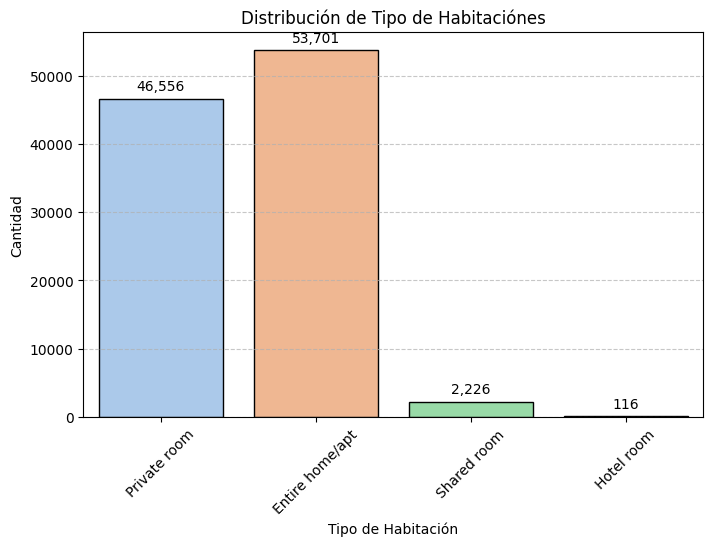

In [ ]:
#Estetica Grafico de Barras
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='room type', hue='room type', palette='pastel',edgecolor='black')

# Agregar % sobre las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=10, color='black',
                       xytext=(0, 9), textcoords='offset points')

#Grid y estilo
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.title('Distribución de Tipo de Habitaciónes')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

 *Este gráfico fue diseñado para identificar la frecuencia con la que se ofrecen diferentes tipos de habitaciones, tales como "entero", "privado" o "compartido". Para crear este gráfico, se empleó la función sns.countplot de la librería Seaborn, utilizando la columna 'room type' en el eje x. Se aplicó una paleta de colores pastel, lo cual ayuda a darle una estética suave y atractiva al gráfico, y se añadió un borde negro alrededor de cada barra para proporcionar mayor definición y contraste entre las categorías.*

*Además de la visualización básica, se añadió una capa adicional de detalle al gráfico al incluir los valores sobre cada barra. Esto se realizó mediante un bucle que recorre cada barra del gráfico y coloca la cantidad exacta de registros en la parte superior de la misma. Este paso es importante porque no solo permite observar la distribución, sino también ofrece un valor numérico exacto para cada categoría, facilitando una interpretación más precisa de los datos.*

*El gráfico también incorpora una cuadrícula en el eje y, utilizando líneas discontinuas, lo cual ayuda a resaltar las diferencias en las alturas de las barras y permite una mejor comparación visual entre las diferentes categorías de tipo de habitación. Finalmente, se ajustaron los títulos, las etiquetas de los ejes y se rotaron las etiquetas del eje x para mejorar la legibilidad del gráfico, asegurando que el resultado fuera claro y visualmente accesible.*

# **Distribución de tipo de habitación (room type)**

Gráfico de Torta → ***ver qué tipo de habitación es más ofrecido (entero, privado, compartido).***

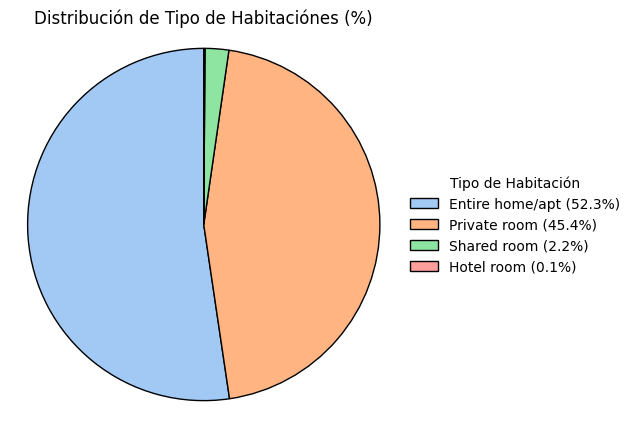

In [ ]:
# Distribución de tipo de habitación
conteo_tipo_de_habitacion = df['room type'].value_counts()

# Calculo de %
percentages = conteo_tipo_de_habitacion / conteo_tipo_de_habitacion.sum() * 100

# Estética Gráfico de barras
color=sns.color_palette('pastel', n_colors=len(conteo_tipo_de_habitacion))
plt.figure(figsize=(5,5))
plt.pie(conteo_tipo_de_habitacion,
         labels=None,
        colors=color,
        startangle=90,
        wedgeprops={'edgecolor': 'black'})

# Ajustar el gráfico
plt.title('Distribución de Tipo de Habitaciónes (%)')
labels = [f'{i} ({j:.1f}%)' for i, j in zip(conteo_tipo_de_habitacion.index, percentages)]
plt.legend(labels,
           loc='center left',
           bbox_to_anchor=(1, 0.5),
           title='Tipo de Habitación',
           frameon=False)
plt.axis('equal')
plt.show()


*Se generó un gráfico de torta para mostrar la distribución porcentual de los tipos de habitación. Este gráfico permite observar de manera intuitiva la proporción de cada tipo de habitación respecto al total. Para crear este gráfico, se utilizó la función plt.pie() de Matplotlib. Se calculó primero el porcentaje de cada tipo de habitación dividiendo el número de registros de cada categoría entre el total de registros y multiplicando por 100. Esto se realizó para proporcionar una visión clara de la participación relativa de cada tipo de habitación en el conjunto de datos.*

*Se empleó la misma paleta de colores pastel utilizada en el gráfico de barras para mantener la coherencia visual entre ambos gráficos. El gráfico fue diseñado con un ángulo inicial de 90 grados y se utilizó un borde negro en cada segmento para dar un toque de definición y resaltar cada sección del gráfico. Para complementar el gráfico, se añadió una leyenda personalizada que incluye tanto los nombres de los tipos de habitación como los porcentajes correspondientes, lo que facilita la interpretación rápida de los datos.*

*El gráfico de torta también se configuró para mostrar una representación equilibrada, con la opción plt.axis('equal') para asegurar que el gráfico tuviera una forma circular perfecta. Esta representación es útil para visualizar de manera rápida y sencilla las proporciones relativas de los diferentes tipos de habitación dentro del conjunto de datos.*

# **Cantidad de alojamientos por barrio (neighbourhood group o neighbourhood)**

Gráfico de barras → ***¿Dónde se concentra la mayoría de los alojamientos?***

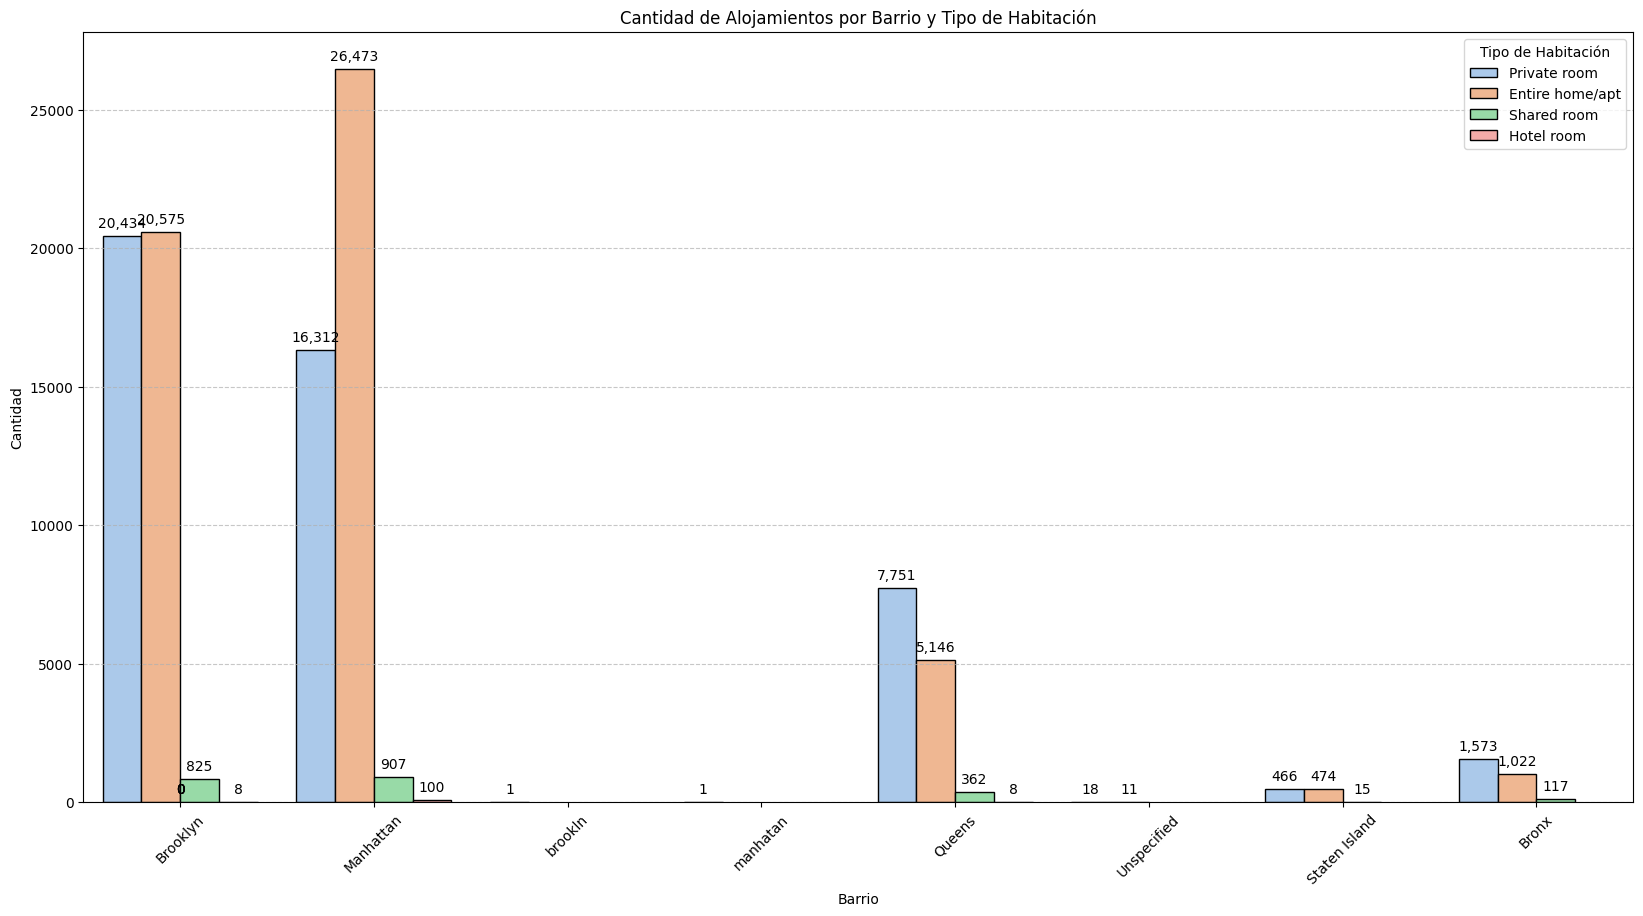

In [ ]:
#Estetica Grafico de barras
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='neighbourhood group', hue='room type', palette='pastel', edgecolor='black')

# Agregar % sobre las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=10, color='black',
                       xytext=(0, 9), textcoords='offset points')

#Grid y estilo
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.title('Cantidad de Alojamientos por Barrio y Tipo de Habitación')
plt.xlabel('Barrio')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Habitación')
plt.show()

*Este gráfico presenta la cantidad de alojamientos disponibles por barrio, con un enfoque adicional para segmentar los alojamientos según el tipo de habitación. Este gráfico de barras se construyó usando sns.countplot, donde la variable 'neighbourhood group' fue colocada en el eje x para mostrar las distintas áreas geográficas, y el parámetro hue se utilizó para diferenciar los tipos de habitación dentro de cada barrio. De esta forma, se puede observar no solo cuántos alojamientos existen por barrio, sino también cómo se distribuyen según el tipo de habitación.*

*El gráfico fue configurado para incluir los porcentajes sobre las barras, similar al gráfico de barras anterior, lo que proporciona una mayor claridad sobre la cantidad exacta de alojamientos en cada barrio, y mejora la comparación visual entre las diferentes categorías. Además, se incluyó una cuadrícula en el eje y para facilitar la lectura de los valores y una rotación de las etiquetas del eje x para mejorar la legibilidad cuando se tienen nombres de barrios largos.*

*La leyenda, que indica el tipo de habitación, se añadió en la parte inferior del gráfico para facilitar la interpretación. Esto permite comparar las cantidades de alojamientos no solo entre barrios, sino también ver cómo se distribuyen los tipos de habitación en cada uno.*



# **Cantidad de alojamientos por barrio (neighbourhood group o neighbourhood)**

Gráfico de Torta → ***¿Dónde se concentra la mayoría de los alojamientos?***

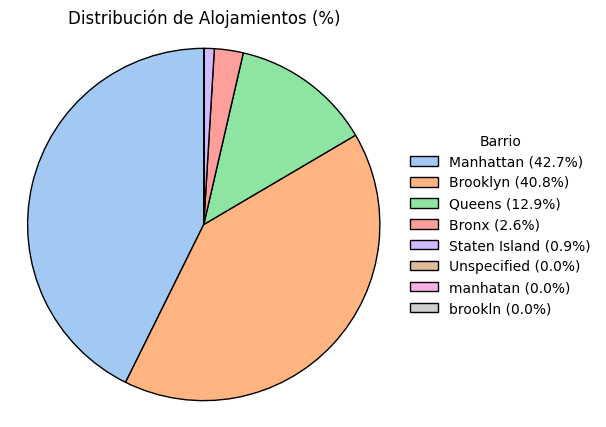

In [ ]:
# % de Distribución de alojamientos
conteo_de_barrios = df['neighbourhood group'].value_counts()

# Calculo de %
percentages = conteo_de_barrios / conteo_de_barrios.sum() * 100

# Estética Gráfico de barras
color=sns.color_palette('pastel', n_colors=len(conteo_de_barrios))
plt.figure(figsize=(5,5))
plt.pie(conteo_de_barrios,
        labels=None,
        colors=color,
        startangle=90,
        wedgeprops={'edgecolor': 'black'})

# Ajustar el gráfico
plt.title('Distribución de Alojamientos (%)')
labels = [f'{i} ({j:.1f}%)' for i, j in zip(conteo_de_barrios.index, percentages)]
plt.legend(labels,
           loc='center left',
           bbox_to_anchor=(1, 0.5),
           title='Barrio',
           frameon=False)
plt.axis('equal')
plt.show()

*Este otro gráfico de torta se hizo para analizar la distribución porcentual de los alojamientos por barrio, este gráfico permite observar la proporción de alojamientos que se encuentran en cada barrio, facilitando una comparación visual de las áreas más representadas dentro del conjunto de datos.*

*El proceso para calcular los porcentajes fue el mismo: se dividió la cantidad de alojamientos por barrio entre el total de alojamientos y se multiplicó por 100. Los colores utilizados en este gráfico fueron consistentes con los anteriores para mantener la coherencia en la paleta de colores.*

*El gráfico fue configurado para mostrar una visualización equilibrada con la opción plt.axis('equal'), lo que asegura que la forma del gráfico sea perfectamente circular. Se añadió también una leyenda, que en este caso incluye tanto los nombres de los barrios como los porcentajes correspondientes, lo que ayuda a interpretar la distribución de los alojamientos de manera sencilla.*

# **Disponibilidad (availability 365)**

Histograma → ***¿Cuántos alojamientos están disponibles todo el año? ¿Cuántos tienen poca disponibilidad?***


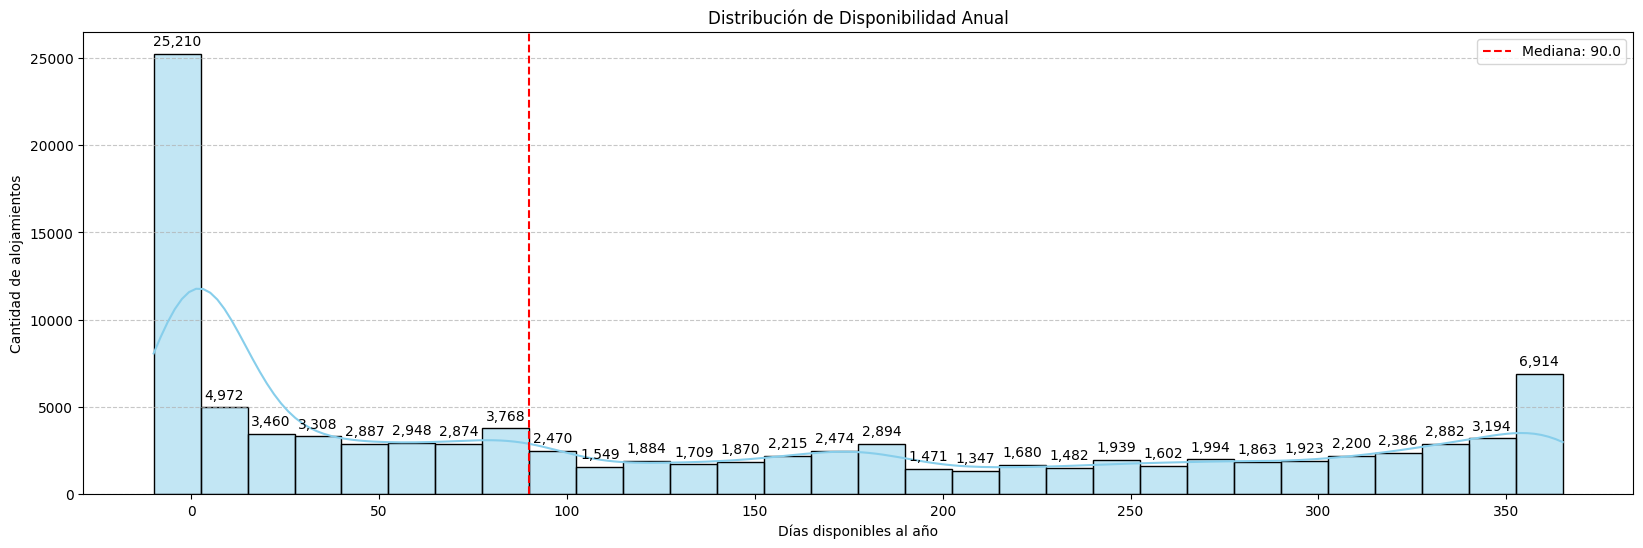

In [ ]:
# Filtro solo alojamiento con disponibilidad entre 0 y 365 dias
df_filtered = df[df['availability 365'] <= 365]

#Estetica de Histograma
plt.figure(figsize=(20,6))
sns.histplot(data=df_filtered, x='availability 365', bins=30, kde=True, color='skyblue', edgecolor='black')
plt.axvline(df_filtered['availability 365'].median(), color='red', linestyle='--', label=f'Mediana: {df_filtered["availability 365"].median()}')
plt.legend()

# Agregar % sobre las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=10, color='black',
                       xytext=(0, 9), textcoords='offset points')

#Grid y estilo
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.title('Distribución de Disponibilidad Anual')
plt.xlabel('Días disponibles al año')
plt.ylabel('Cantidad de alojamientos')
plt.show()

*El histograma fue creado para mostrar la distribución de la disponibilidad de los alojamientos a lo largo del año, con el objetivo de identificar cuántos alojamientos están disponibles durante todo el año y cuántos tienen una disponibilidad más limitada. Para esto, se filtraron los datos de la columna 'availability 365' para asegurarse de que solo se incluyeran aquellos alojamientos cuya disponibilidad estuviera entre 0 y 365 días.*

*Se utilizó sns.histplot para crear el histograma, que fue configurado con 30 bins y una línea de densidad (KDE) para proporcionar una visión detallada de la distribución de los valores. Además, se añadió una línea vertical roja que indica la mediana de los datos, lo que ayuda a visualizar rápidamente el punto central de la distribución. Los valores de cada barra fueron etiquetados sobre ellas para proporcionar información adicional y hacer el gráfico más informativo.*

*La cuadrícula en el eje y, las etiquetas de los ejes y el título fueron configurados para mejorar la claridad del gráfico. Este histograma es útil para observar cómo varía la disponibilidad de los alojamientos a lo largo del año y para identificar si existen tendencias o patrones importantes.*

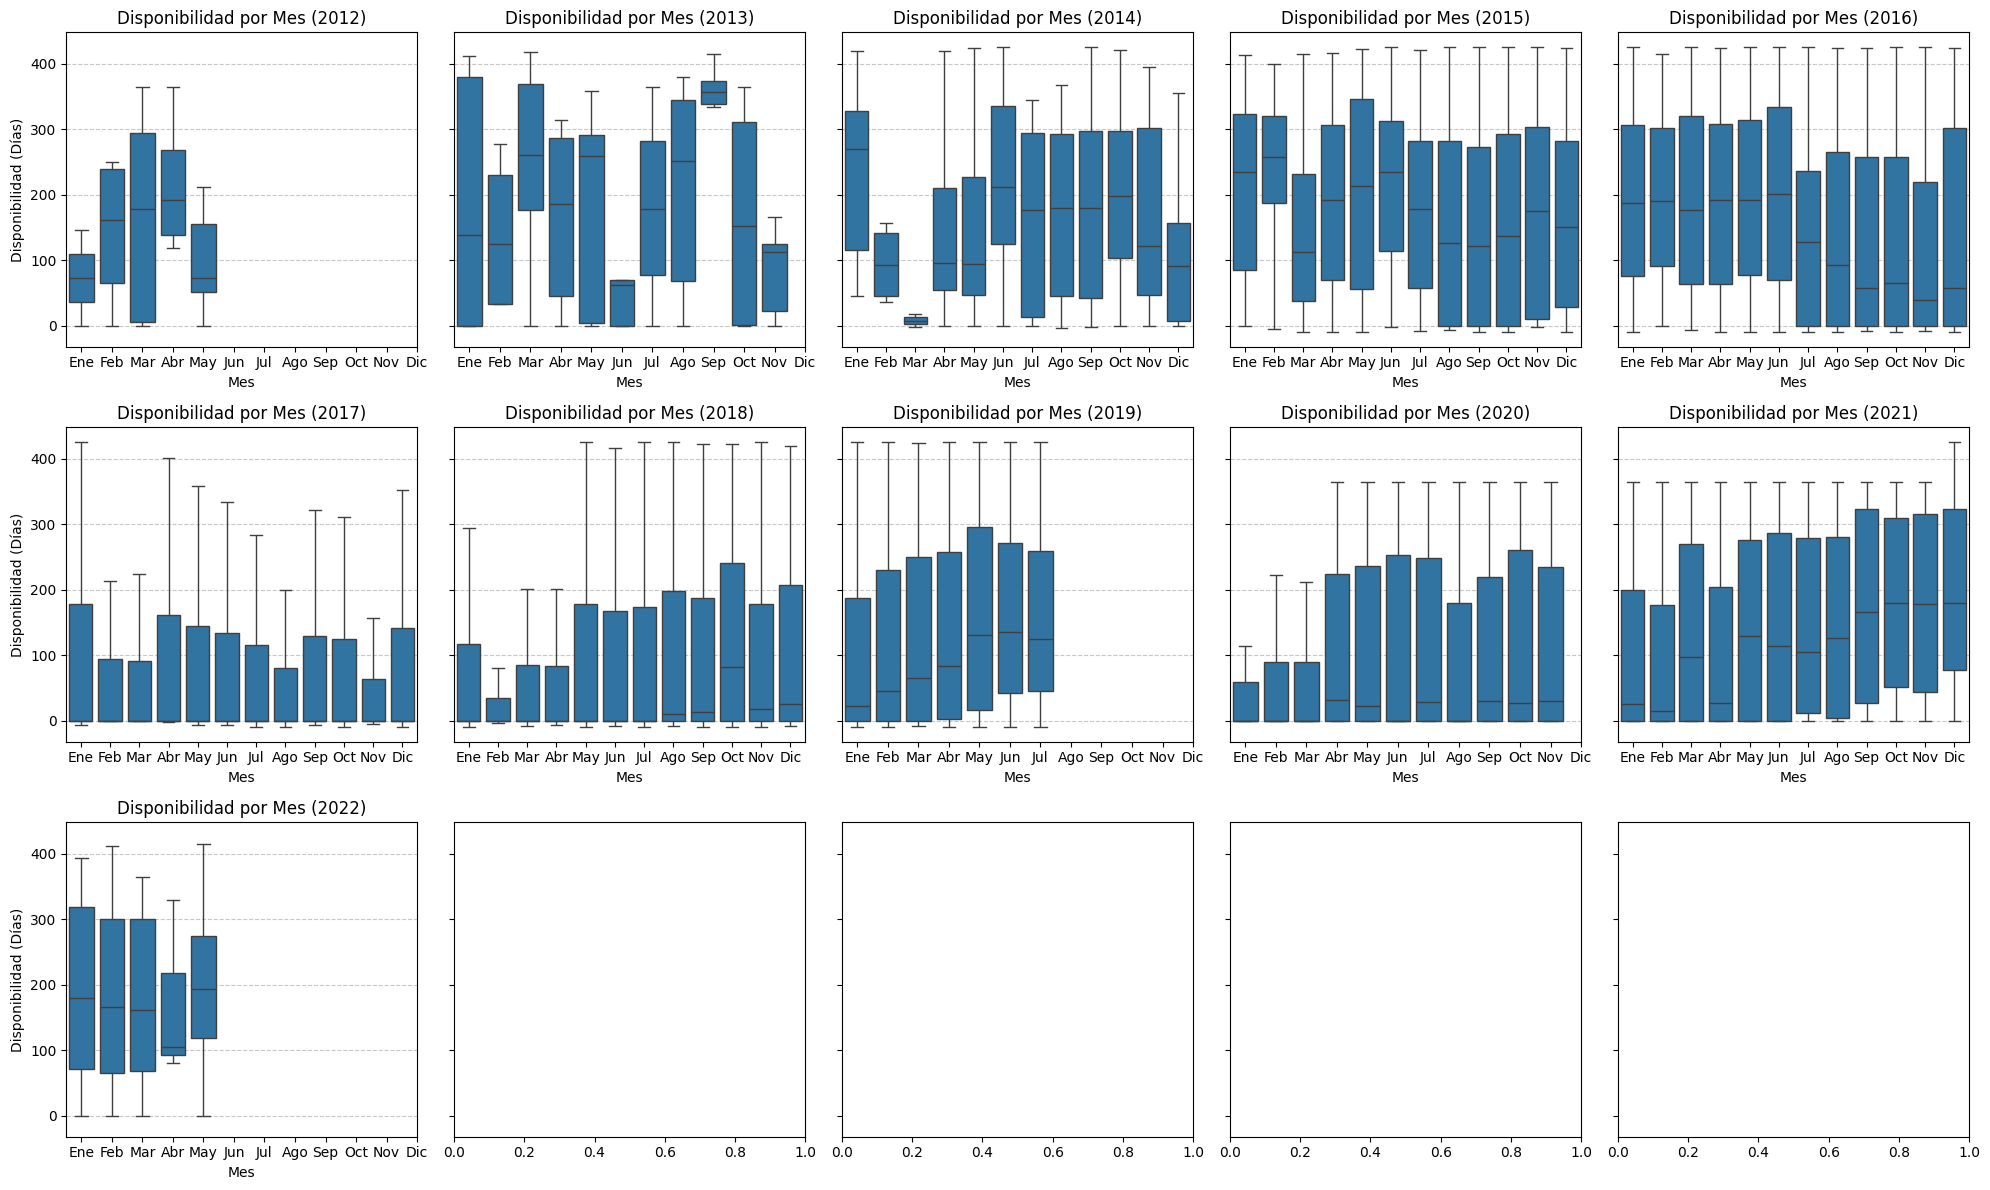

In [ ]:
# Lista de los años que se Visualizaran
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Subgráficos de 3 filas y 5 columnas (para cubrir todos los años)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12), sharey=True)

# Aplanar la matriz de ejes para facilitar la iteración
axes = axes.flatten()

# Grafico por año
for i, year in enumerate(years):
    ax = axes[i]

    # Filtrar los datos para el año específico
    df_year = df[df['year'] == year]

    # Gráfico de barras para mostrar la disponibilidad de los alojamientos por mes para ese año
    sns.boxplot(data=df_year, x='month', y='availability 365', ax=ax, showfliers=False)

    #Grid y estilo
    ax.set_title(f'Disponibilidad por Mes ({year})')
    ax.set_xlabel('Mes')
    ax.set_ylabel('Disponibilidad (Días)')
    ax.set_xticks(range(12))
    ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Espacio entre Graficos
plt.tight_layout()

plt.show()

*Para analizar la disponibilidad de los alojamientos por mes a lo largo de los años, se creó un conjunto de subgráficos, donde cada uno muestra un gráfico de cajas para cada año, con la variable 'month' en el eje x y 'availability 365' en el eje y. Esto permite observar cómo cambia la disponibilidad mes a mes para cada año, proporcionando una visión detallada de las fluctuaciones en la oferta de alojamiento.*

*Para la visualización, se utilizó sns.boxplot, lo que permitió mostrar los rangos intercuartiles, los valores atípicos y la mediana de la disponibilidad de los alojamientos para cada mes en cada año. Los subgráficos fueron distribuidos en una cuadrícula de 3 filas y 5 columnas para cubrir los 11 años de datos, con etiquetas personalizadas para los meses y una cuadrícula en el eje y para mejorar la lectura de los valores.*

*Este enfoque es valioso para detectar tendencias a lo largo del tiempo, como la variación de la disponibilidad según la temporada o el año, y proporciona una visión clara de los patrones de oferta a lo largo de los meses de cada año.*

# **Relación entre precio y tipo de habitación (price vs room type)**

Boxplot → ***¿Cuál es la variación de precios en cada tipo de alojamiento?***

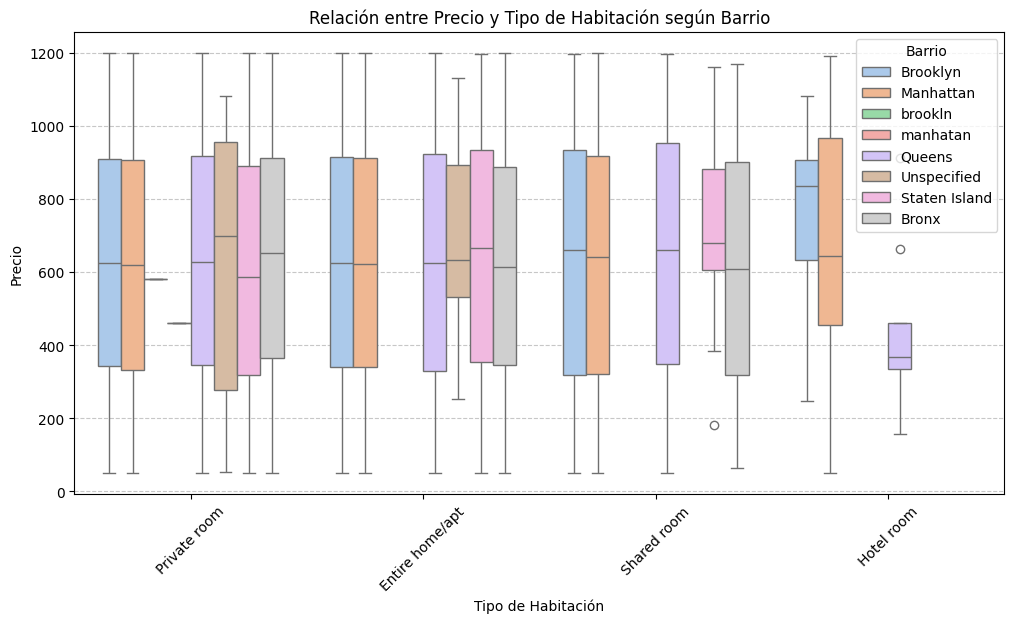

In [ ]:
#Estetica de Histograma
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='room type', y='price', hue='neighbourhood group', palette='pastel')

#Grid y estilo

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Relación entre Precio y Tipo de Habitación según Barrio')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.legend(title='Barrio')
plt.show()

*Finalmente, se creó un gráfico de caja para analizar la relación entre los precios de los alojamientos y el tipo de habitación. Este gráfico permite observar la distribución de los precios dentro de cada tipo de habitación y también compararlos según los barrios.*

*Para este gráfico, se utilizó sns.boxplot, donde 'room type' se colocó en el eje x y 'price' en el eje y, con el parámetro hue para segmentar los datos por barrio. Esto permite observar cómo varían los precios según el tipo de habitación y el barrio en el que se encuentra. Los gráficos de caja muestran no solo la mediana, sino también los rangos intercuartiles y los valores atípicos, lo que proporciona una visión más completa de la variabilidad de los precios.*

*El gráfico fue complementado con una cuadrícula en el eje y y ajustes en el diseño, como la rotación de las etiquetas del eje x, para mejorar la presentación y facilitar la interpretación de los datos. Este análisis es útil para entender las diferencias de precios entre los tipos de habitación y los barrios.*

# **Conclusión de las Visualizaciones**

Las visualizaciones presentadas ofrecen un análisis detallado de los alojamientos disponibles, brindando una visión más clara sobre la distribución de los tipos de habitación, la disponibilidad por barrio y mes, y la relación entre precios y tipo de habitación. A continuación, se describen los principales hallazgos derivados de cada visualización:

# **Distribución de Tipo de Habitación (Gráfico de Barras y Torta)**

Los gráficos de barras y torta permiten observar la frecuencia y la distribución porcentual de los diferentes tipos de habitación. El gráfico de barras muestra que el tipo de habitación más común es el 'entero', seguido por las habitaciones 'privadas' y 'compartidas'. La visualización de torta refuerza esta distribución, destacando la proporción de cada tipo de habitación dentro del total. Esto indica que la mayoría de los alojamientos disponibles ofrecen habitaciones enteras, lo cual podría reflejar una mayor demanda por privacidad o espacio completo durante las estancias.

# **Cantidad de Alojamientos por Barrio (Gráfico de Barras y Torta)**

El gráfico de barras proporciona información relevante sobre la cantidad de alojamientos por barrio, permitiendo identificar las áreas con mayor concentración de opciones para los huéspedes. La visualización de torta, por su parte, revela las proporciones relativas de alojamientos en los distintos barrios, destacando aquellos con mayor cantidad de alojamientos. Esta segmentación es esencial para comprender la distribución geográfica de la oferta y podría ser útil para estrategias de marketing y precios, dependiendo de la ubicación.

# **Disponibilidad (Histograma)**

El histograma de disponibilidad muestra que una gran parte de los alojamientos tiene disponibilidad limitada a lo largo del año, lo que podría indicar una estacionalidad en la oferta o una alta demanda en ciertos períodos. La presencia de picos en las disponibilidades cercanas al valor máximo (365 días) sugiere que algunos alojamientos están disponibles durante todo el año, mientras que otros tienen una disponibilidad más restringida. Esta información es crucial para entender la flexibilidad de la oferta y cómo esta puede adaptarse a las necesidades de los usuarios.

# **Disponibilidad por Mes (Subgráficos por Año)**

Los subgráficos de disponibilidad por mes proporcionan un análisis más detallado y temporal de la oferta de alojamientos a lo largo del año. Al observar cómo varía la disponibilidad en función de los meses y los años, se puede identificar si existen tendencias estacionales, como picos de disponibilidad en ciertas épocas del año (por ejemplo, durante las vacaciones o en temporadas altas). Esto podría ser útil para entender los patrones de demanda y ajustar las estrategias de precios o la gestión de la disponibilidad en consecuencia.

# **Relación entre Precio y Tipo de Habitación (Boxplot)**

El boxplot que muestra la relación entre el precio y el tipo de habitación ofrece una visión clara de las variaciones de precios dentro de cada tipo de habitación. Al observar las diferencias en la distribución de precios por tipo de habitación y por barrio, se puede deducir que las habitaciones 'enteras' tienden a tener precios más altos, lo que refuerza la idea de que los huéspedes valoran más la privacidad y el espacio completo. Los valores atípicos en los precios también indican la presencia de alojamientos de lujo o excepcionales en ciertas zonas, lo cual es útil para identificar segmentos de mercado específicos.

# **Impacto General de las Visualizaciones**

Las visualizaciones proporcionan información valiosa que permite comprender mejor la distribución y las características de los alojamientos disponibles en función del tipo de habitación, la ubicación, la disponibilidad y el precio.

**Distribución Geográfica:** Gracias a las visualizaciones de cantidad de alojamientos por barrio, se puede identificar rápidamente qué barrios tienen una mayor concentración de opciones de alojamiento, lo cual es crucial para decisiones de inversión y estrategias de marketing.

**Comportamiento de Precios:** Las visualizaciones de la relación entre precio y tipo de habitación permiten entender mejor cómo se segmentan los precios según la oferta de habitaciones, lo que es clave para definir estrategias de precios y evaluar la competitividad de los alojamientos en diferentes barrios.

**Estacionalidad y Flexibilidad:** Las gráficas de disponibilidad, tanto a lo largo del año como por mes, revelan patrones estacionales y de flexibilidad en la oferta, lo que es útil para ajustar las ofertas y precios de acuerdo con la demanda esperada.


# **Visualizaciones Comparativas Más Específicas**

Objetivo: ***Buscar relaciones o patrones entre variables.***


# **Precio promedio por barrio (neighbourhood group)**

Gráfico de barras → ***¿Qué barrio tiene alojamientos más caros o más baratos?***


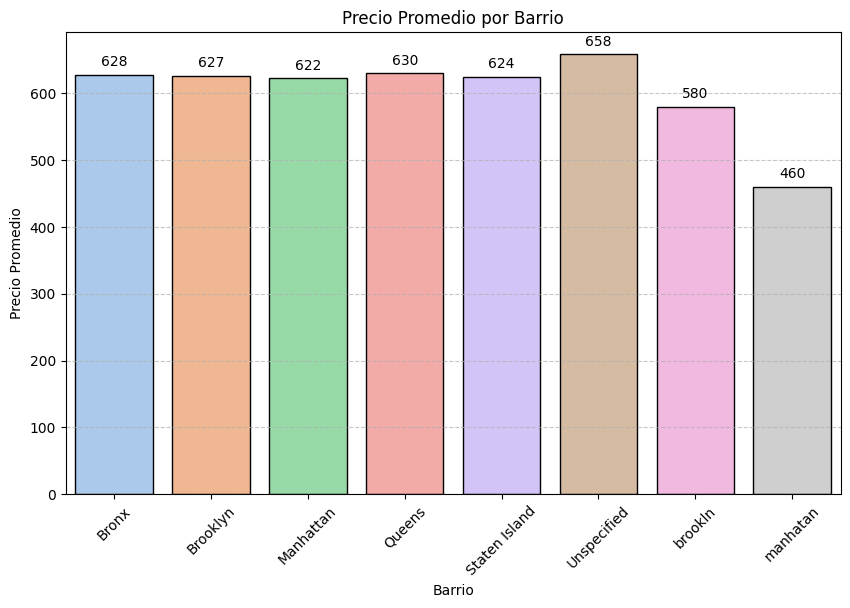

In [ ]:
# Agrupamos para calcular precio promedio
precio_promedio_por_barrio = df.groupby('neighbourhood group')['price'].mean().reset_index()

# Estética Grafic de barras
plt.figure(figsize=(10,6))
sns.barplot(data=precio_promedio_por_barrio, x='neighbourhood group', y='price',hue='neighbourhood group', palette='pastel', edgecolor='black')

# Agregar % sobre las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=10, color='black',
                       xytext=(0, 9), textcoords='offset points')

# Grid y estilo
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Precio Promedio por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.show()

*El gráfico de barras utilizado para analizar el precio promedio de los alojamientos por barrio fue creado utilizando la función sns.barplot de la librería Seaborn. En este caso, se agrupó por la columna 'neighbourhood group' para calcular el precio promedio de cada barrio, y el eje y representó el precio promedio. Para darle una estética atractiva y coherente con el resto de las visualizaciones, se utilizó una paleta de colores pastel, y se añadió un borde negro alrededor de las barras para proporcionar un contraste visual.*

*Para agregar valor adicional al gráfico, se incluyeron los valores del precio promedio sobre cada barra. Este paso se realizó mediante un bucle que recorre cada barra y coloca el valor exacto sobre ella, facilitando la interpretación precisa de los datos. El gráfico también incorporó una cuadrícula en el eje y, usando líneas discontinuas, lo cual ayuda a observar las diferencias entre los barrios y mejora la comparación visual entre ellos.*

*Finalmente, se ajustaron las etiquetas del eje x para mejorar su legibilidad, debido a que los nombres de los barrios pueden ser largos, y se rotaron las etiquetas en 45 grados para asegurar que fueran fáciles de leer.*

# **Precio promedio por barrio (neighbourhood group)**

Gráfico de Torta → ***¿Qué barrio tiene alojamientos más caros o más baratos?***


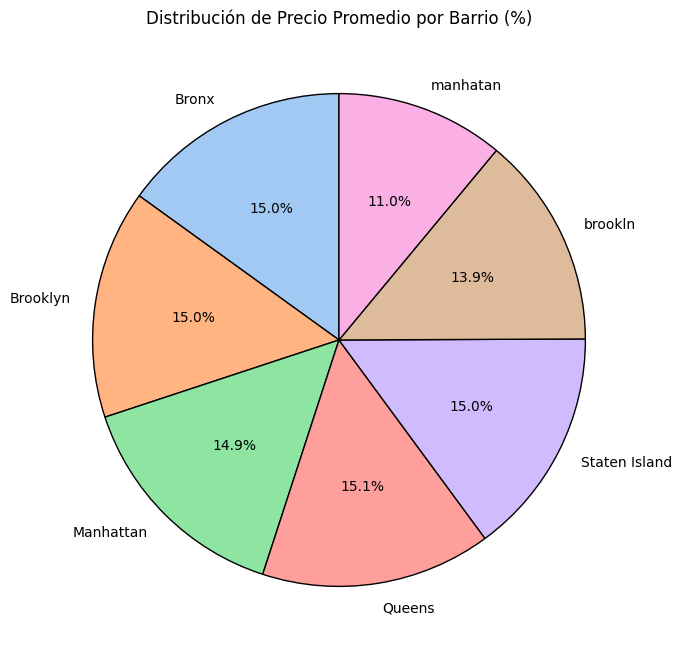

In [ ]:
# Filtro para obviar 'Unspecified' de 'neighbourhood group'
df_filtrado = df[df['neighbourhood group'] != 'Unspecified']

# Promedio de precio por barrio
precio_promedio_por_barrio = df_filtrado.groupby('neighbourhood group')['price'].mean().reset_index()

# Distribución % de precios promedio por barrio
plt.figure(figsize=(8,8))
plt.pie(precio_promedio_por_barrio['price'], labels=precio_promedio_por_barrio['neighbourhood group'], autopct='%1.1f%%',
        colors=sns.color_palette('pastel', n_colors=len(precio_promedio_por_barrio)), startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribución de Precio Promedio por Barrio (%)')
plt.show()

*Este gráfico de torta que muestra la distribución porcentual del precio promedio por barrio. Este gráfico se construyó utilizando la función plt.pie() de Matplotlib. La proporción de cada barrio se calculó dividiendo el precio promedio de cada barrio entre el precio promedio total y multiplicando por 100.*

*Se utilizó la misma paleta de colores pastel para mantener la consistencia visual entre ambos gráficos. Cada segmento del gráfico fue bordeado en negro para dar mayor definición, y se configuró para mostrar los porcentajes sobre cada sección. Además, se añadió una leyenda que incluye tanto el nombre del barrio como el porcentaje correspondiente, lo que facilita la interpretación rápida del gráfico.*

*Se empleó la opción plt.axis('equal') para garantizar que el gráfico tuviera una forma circular perfecta, lo cual ayuda a visualizar la distribución de manera equilibrada.*

# **Número de reseñas vs. precio (number of reviews vs price)**

Scatterplot → ***¿Los alojamientos más caros tienen más o menos reseñas?***


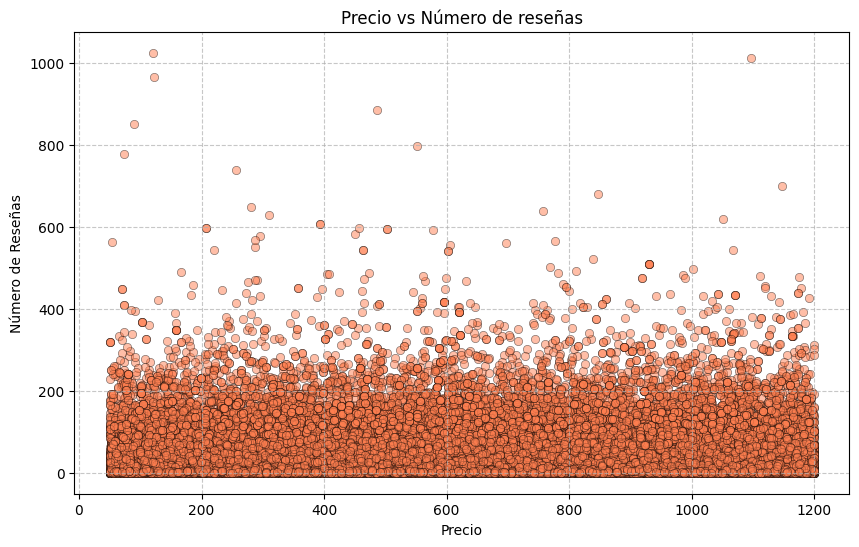

In [ ]:
# Estética Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='price', y='number of reviews', alpha=0.5, color='coral', edgecolor='black')
# Grid y estilo
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.title('Precio vs Número de reseñas')
plt.xlabel('Precio')
plt.ylabel('Número de Reseñas')
plt.show()

*Se utilizó un gráfico de dispersión (scatterplot) para examinar la relación entre el precio de los alojamientos y el número de reseñas. Se empleó la función sns.scatterplot para representar cada punto como un alojamiento, con el precio en el eje x y el número de reseñas en el eje y. Para darle mayor claridad visual, se aplicó un color coral y un borde negro alrededor de los puntos.*

*Este tipo de visualización es útil para observar si existe una correlación entre el precio y el número de reseñas. Se agregó una cuadrícula en ambos ejes para mejorar la lectura de los datos, lo que permite visualizar claramente las posibles tendencias entre las dos variables.*

# **Relación entre cantidad de reviews y disponibilidad (number of reviews vs availability 365)**

Scatterplot → ***¿Los alojamientos más disponibles reciben más reviews?***

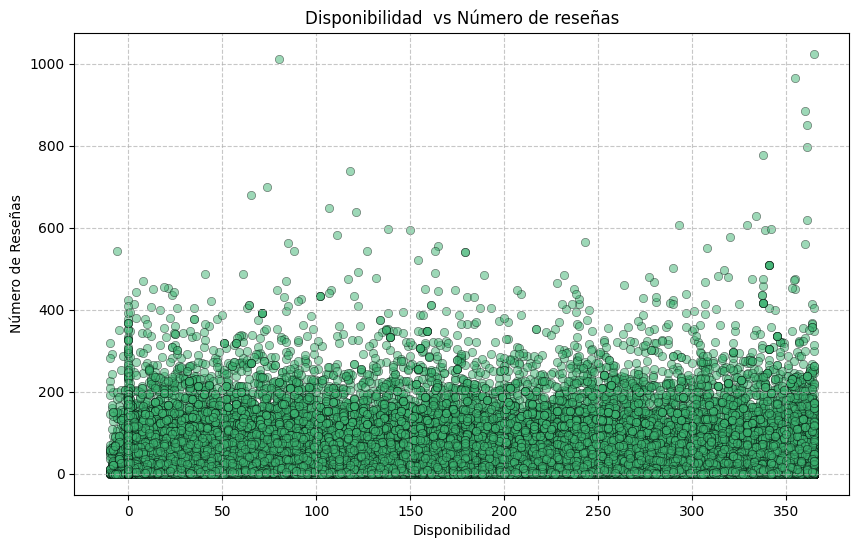

In [ ]:
# Filtro solo alojamiento con disponibilidad entre 0 y 365 dias
df_filtered = df[df['availability 365'] <= 365]

# Estética Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_filtered, x='availability 365', y='number of reviews', alpha=0.5, color='mediumseagreen', edgecolor='black')

# Grid y estilo
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.title('Disponibilidad  vs Número de reseñas')
plt.xlabel('Disponibilidad')
plt.ylabel('Número de Reseñas')
plt.show()

*Este gráfico de dispersión fue creado para explorar la relación entre la disponibilidad de los alojamientos y el número de reseñas que reciben. Se filtraron los datos para asegurar que solo se incluyeran los alojamientos con disponibilidad entre 0 y 365 días. El gráfico fue construido de manera similar al anterior, con la disponibilidad en el eje x y el número de reseñas en el eje y, y se utilizó un color verde para los puntos y un borde negro para la definición.*

*Al igual que en el gráfico anterior, se añadió una cuadrícula para mejorar la comparación visual y facilitar la identificación de patrones entre ambas variables.*

# **Política de cancelación por barrio (neighbourhood group)**

Gráfico de barras → ***Analizar cómo se distribuyen las políticas de cancelación en diferentes barrios.***

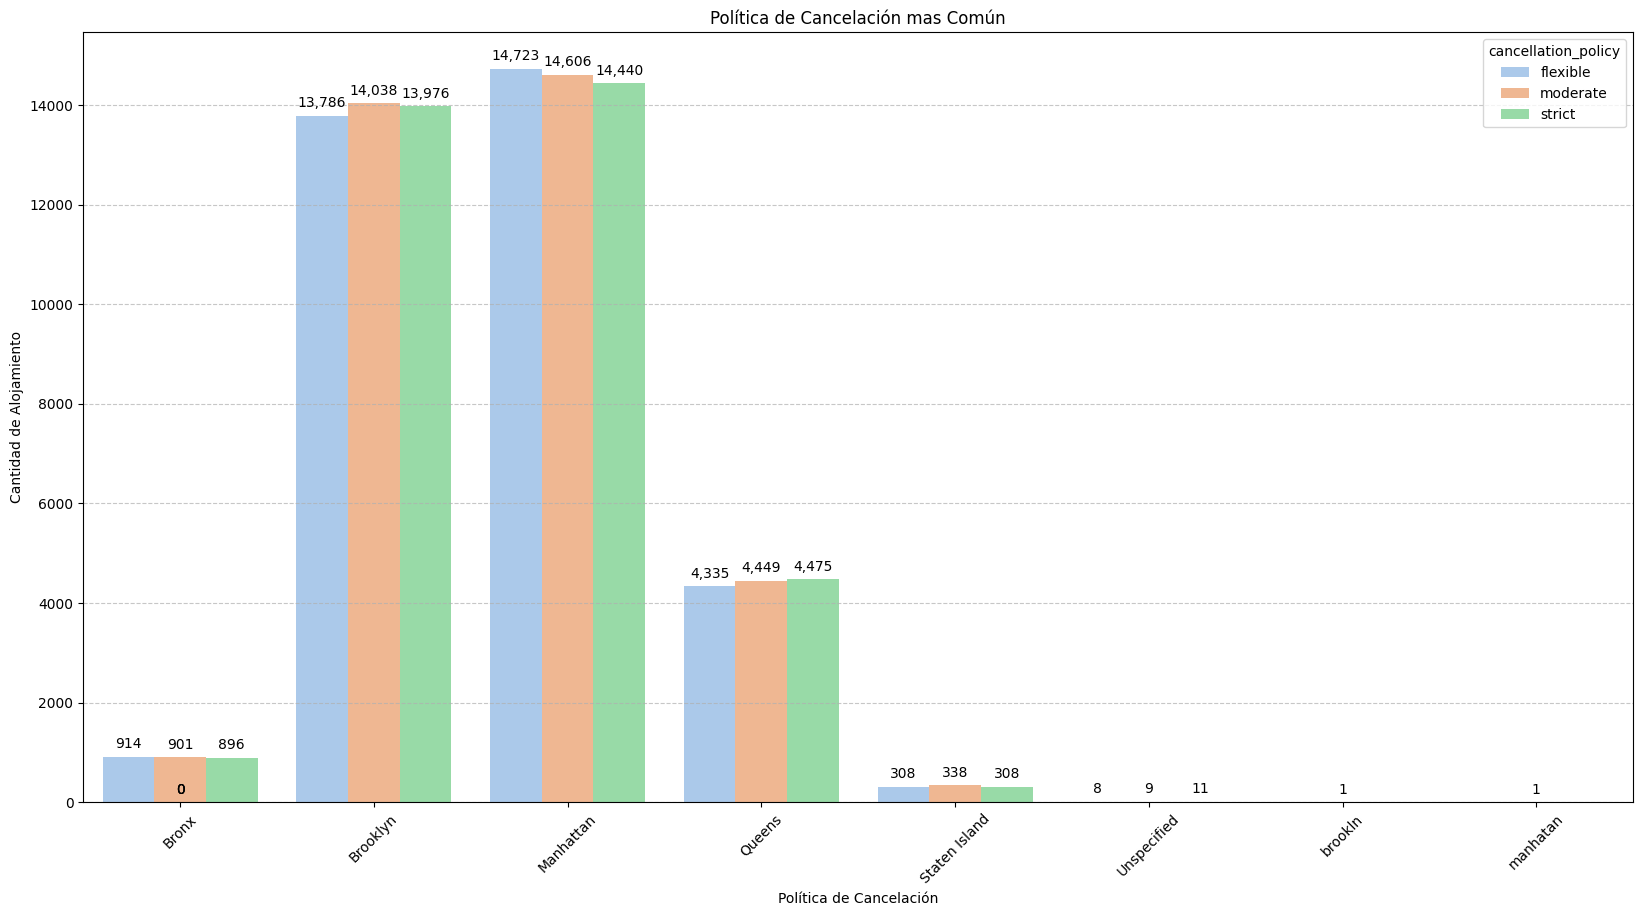

In [ ]:
# Agrupar por barrio y política de cancelación
política_por_barrio = df[df['cancellation_policy'].isin(['flexible', 'moderate', 'strict'])] \
                      .groupby(['neighbourhood group', 'cancellation_policy']).size().reset_index(name='count')

# Estética Gráfico de barras
plt.figure(figsize=(20,10))
sns.barplot(data=política_por_barrio, x='neighbourhood group', y='count', hue='cancellation_policy', palette='pastel')

# Agregar % sobre las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=10, color='black',
                       xytext=(0, 9), textcoords='offset points')

# Grid y estilo
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Política de Cancelación mas Común')
plt.xlabel('Política de Cancelación')
plt.ylabel('Cantidad de Alojamiento')
plt.xticks(rotation=45)
plt.show()


*Para investigar cómo se distribuyen las políticas de cancelación entre los barrios, se creó un gráfico de barras utilizando sns.barplot. En este caso, se agruparon los datos por barrio y política de cancelación. El gráfico muestra la cantidad de alojamientos con cada tipo de política de cancelación en cada barrio. Se utilizó una paleta de colores pastel para las barras, con el parámetro hue para diferenciar las políticas de cancelación dentro de cada barrio.*

*Al igual que en los gráficos anteriores, se añadieron los valores sobre las barras para proporcionar más detalle y hacer que la visualización sea más informativa. Además, se utilizó una cuadrícula en el eje y y se rotaron las etiquetas del eje x para mejorar la legibilidad.*

# **Conclusión de las Visualizaciones Comparativas Más Específicas**

Las visualizaciones presentadas en esta sección buscan identificar relaciones y patrones entre variables clave, permitiendo un análisis más profundo sobre cómo se distribuyen los precios, las reseñas, la disponibilidad y las políticas de cancelación entre los diferentes barrios. A continuación se detallan los hallazgos y lo que nos indican cada una de las visualizaciones:

# **Precio Promedio por Barrio (Gráfico de Barras)**

El gráfico de barras muestra cómo se distribuye el precio promedio de los alojamientos entre los diferentes barrios. Este gráfico revela que algunos barrios tienen precios significativamente más altos que otros, lo que sugiere que la ubicación juega un papel crucial en la determinación del costo del alojamiento. La inclusión de etiquetas con el porcentaje sobre cada barra permite observar las diferencias relativas entre los barrios de manera más clara, y también proporciona una referencia visual sobre cuál es el barrio más caro y el más barato.

Permitiendo identificar los barrios de alta gama con precios más altos y los barrios más accesibles con precios más bajos, lo que es útil para los huéspedes al momento de seleccionar una ubicación según su presupuesto, y también ayuda a los anfitriones a ajustar sus precios según la competitividad de la zona.

# **Precio Promedio por Barrio (Gráfico de Torta)**

El gráfico de torta complementa el análisis del gráfico de barras, mostrando la distribución porcentual de los precios promedio por barrio. Este gráfico pone en perspectiva las proporciones relativas de cada barrio en relación al precio, lo que facilita entender qué barrios representan un porcentaje mayor del total de los precios más altos o más bajos.

# **Número de Reseñas vs. Precio (Scatterplot)**

El scatterplot revela la relación entre el número de reseñas y el precio de los alojamientos. En este gráfico, se puede observar si existe alguna correlación entre precios altos y una mayor cantidad de reseñas. A pesar de que los alojamientos más caros pueden tener una tendencia a recibir más reseñas, también se observa que esta relación no es necesariamente lineal, lo que sugiere que otros factores, como la calidad o la visibilidad del alojamiento, pueden influir más en la cantidad de reseñas que en el precio.

# **Relación entre Número de Reseñas y Disponibilidad (Scatterplot)**

El scatterplot de disponibilidad versus número de reseñas indica si los alojamientos más disponibles tienden a recibir más reseñas. Al observar los puntos dispersos en el gráfico, se puede notar que, en general, los alojamientos con mayor disponibilidad tienden a recibir más reseñas, lo que puede sugerir que aquellos que están disponibles durante más tiempo tienen más oportunidades de ser reservados y, por lo tanto, reciben más comentarios.Esto podría ser útil para los anfitriones que buscan aumentar la visibilidad y las reseñas de sus alojamientos.

# **Política de Cancelación por Barrio (Gráfico de Barras)**

El gráfico de barras de políticas de cancelación por barrio muestra cómo se distribuyen las distintas políticas de cancelación (flexible, moderada, estricta) en cada barrio. Esta visualización revela qué barrios ofrecen más opciones con políticas flexibles y cuáles predominan con políticas más estrictas. Además, se puede observar cómo la elección de la política de cancelación varía en función del barrio y de la oferta de alojamiento.

# **Impacto General de las Visualizaciones Comparativas**

Estas visualizaciones comparativas proporcionan una comprensión más detallada de cómo diferentes factores, como la ubicación, la disponibilidad y las políticas de cancelación, influyen en los precios, las reseñas y las interacciones entre los huéspedes y los alojamientos.

**Distribución de Precios:** El análisis comparativo de los precios por barrio permite a los usuarios identificar las áreas más caras o más accesibles, lo que facilita la toma de decisiones tanto para huéspedes como para anfitriones.

**Popularidad y Reseñas:** Aunque la relación entre precio y reseñas no es siempre lineal, las visualizaciones sugieren que la disponibilidad y la frecuencia de las reseñas podrían estar más influenciadas por factores distintos al precio, como la visibilidad o la ubicación del alojamiento.

**Políticas de Cancelación:** Las políticas de cancelación varían entre barrios, lo que puede influir en la elección de los huéspedes, especialmente aquellos que valoran la flexibilidad al momento de realizar una reserva.

# **Visualizaciones de Calidad de Datos o Análisis Extra**

Objetivo: *Mostrar el impacto de tu limpieza de datos y entender mejor los datos categóricos.*


# **Cantidad de alojamientos por estado de verificación del host (host_identity_verified)**

Gráfico de Torta → ***¿Cuántos hosts tienen identidad verificada?***


host_identity_verified
unconfirmed    51489
verified       51110
Name: count, dtype: int64


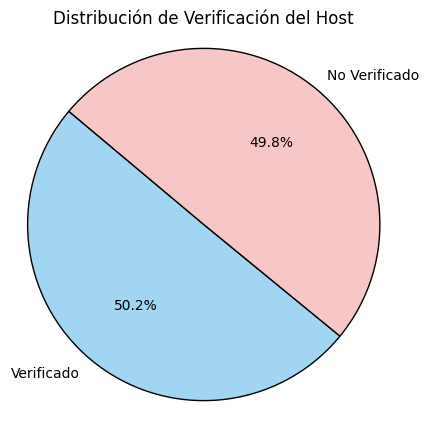

In [ ]:
# Verificación de 'host_identity_verified'
verificacion_host = df['host_identity_verified'].value_counts()

print(df['host_identity_verified'].value_counts())

# Estética Gráfico de barras
plt.figure(figsize=(5,5))
plt.pie(
    verificacion_host,
    labels=['Verificado', 'No Verificado'],
    autopct='%1.1f%%',
    colors=['#A2D5F2', '#F7C6C7'],  # Colores pasteles
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)

# Grid y estilo
plt.title('Distribución de Verificación del Host')
plt.axis('equal')
plt.show()

*El gráfico de torta utilizado para visualizar la distribución de los hosts verificados se creó con la función plt.pie() de la librería Matplotlib. Primero, se agruparon los valores de la columna 'host_identity_verified' para contar la cantidad de hosts verificados y no verificados.*

*Para darle un toque estético, se utilizó una paleta de colores pasteles (azul para los verificados y rosa para los no verificados), y se añadió un borde negro a cada segmento para mejorar la definición.*

*Los porcentajes de cada sección se mostraron sobre los segmentos para facilitar la interpretación visual del gráfico. Además, se aplicó la opción plt.axis('equal') para garantizar que el gráfico tuviera una forma circular perfecta, lo que da una sensación de equilibrio y armonía visual.*

# **Cantidad de alojamientos con estado de verificación del host por 'neighbourhood group' (host_identity_verified)**

Gráfico de Torta → ***¿Cuántos hosts tienen identidad verificada por 'neighbourhood group'?***

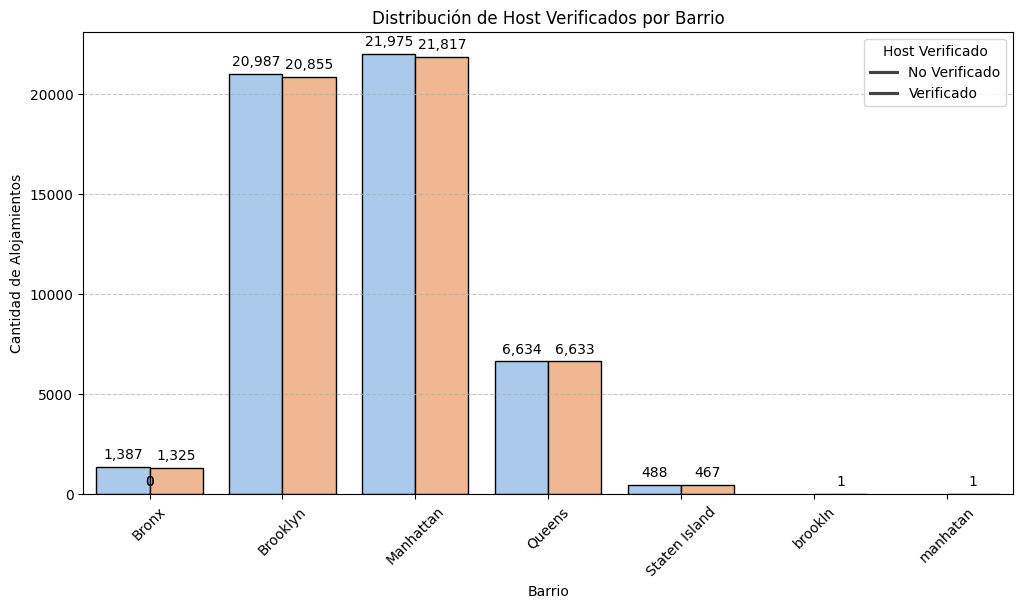

In [ ]:
# Filtro para obviar 'Unspecified' de 'neighbourhood group'
df_filtrado = df[df['neighbourhood group'] != 'Unspecified']

# Agrupar y contar host verificados por neighbourhood group
host_verificado_por_barrio = df_filtrado.groupby(['neighbourhood group', 'host_identity_verified']).size().reset_index(name='count')

# Estética Gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(
    data=host_verificado_por_barrio,
    x='neighbourhood group',
    y='count',
    hue='host_identity_verified',
    palette='pastel',
    edgecolor='black'
)

# Agregar % sobre las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=10, color='black',
                       xytext=(0, 9), textcoords='offset points')

# Grid y estilo
plt.title('Distribución de Host Verificados por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Cantidad de Alojamientos')
plt.legend(title='Host Verificado', labels=['No Verificado', 'Verificado'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


*Este gráfico de barras fue generado con la función sns.barplot() de Seaborn, agrupando los datos por las columnas 'neighbourhood group' y 'host_identity_verified'. El gráfico muestra la cantidad de alojamientos verificados y no verificados en cada barrio.*

*Para mantener la coherencia visual con las otras visualizaciones, se utilizó una paleta de colores pastel y bordes negros en las barras. Para mejorar la interpretación, se añadieron los valores numéricos de cada barra, lo que permite conocer la cantidad exacta de alojamientos en cada categoría.*

*Se añadió una cuadrícula en el eje y con líneas discontinuas para mejorar la comparación visual y facilitar la observación de las diferencias entre los barrios. Las etiquetas del eje x se rotaron 45 grados para facilitar la lectura, ya que los nombres de los barrios eran largos.*

# **Conclusión de las Visualizaciones de Calidad de Datos y Análisis Extra**

Las visualizaciones presentadas en esta sección proporcionan una visión más profunda sobre la calidad de los datos y las distribuciones de variables clave, como el estado de verificación del host y su relación con la ubicación. Estos análisis permiten comprender mejor la influencia de factores como la verificación del host y el barrio, y cómo estos impactan la distribución de los alojamientos en la plataforma. A continuación, se describen los hallazgos y la importancia de cada visualización:

# **Cantidad de Alojamientos por Estado de Verificación del Host (Gráfico de Torta)**

 Este gráfico de torta muestra la distribución de los alojamientos según si el host tiene la identidad verificada o no. Los resultados muestran una diferencia notable entre los hosts verificados y no verificados. La proporción de hosts verificados frente a no verificados puede influir en la percepción de los huéspedes sobre la confiabilidad de los alojamientos y, por ende, en su decisión de reserva. Este gráfico también es útil para los anfitriones que deseen priorizar la verificación de identidad y aumentar la confianza de los huéspedes.

# **Cantidad de Alojamientos con Estado de Verificación del Host por Barrio (Gráfico de Barras) **

El gráfico de barras proporciona una comparación detallada de la cantidad de alojamientos con hosts verificados en cada barrio. Este análisis es útil para ver cómo varía la verificación del host según la ubicación, permitiendo identificar en qué barrios predominan los alojamientos verificados y cuáles tienen una mayor proporción de hosts no verificados.

La inclusión de porcentajes sobre cada barra facilita la comparación visual y permite observar con claridad qué barrios tienen una mayor concentración de alojamientos con hosts verificados. Esto puede ayudar tanto a los huéspedes como a los anfitriones a entender la tendencia en cada barrio y cómo la verificación del host puede estar relacionada con la demanda o la confianza de los huéspedes.

# **Impacto General de las Visualizaciones**

Los análisis sugieren que la verificación del host es un factor relevante para los huéspedes que buscan confiar en los alojamientos. Los gráficos permiten observar que la verificación del host podría correlacionarse con una mayor preferencia en barrios específicos, sugiriendo que los huéspedes se sienten más cómodos con hosts verificados, lo cual impacta en las decisiones de reserva.

La segmentación por barrio demuestra que algunos barrios pueden tener una mayor proporción de alojamientos verificados, lo que indica que la verificación no es uniforme en toda la plataforma, y que puede ser más común en zonas con alta demanda o más exclusivas.


# **Visualización: Análisis de Alojamiento**

# **Distribución de Precios de Alojamiento**

Histograma → ***Ver cómo se distribuyen los precios de los alojamientos.***

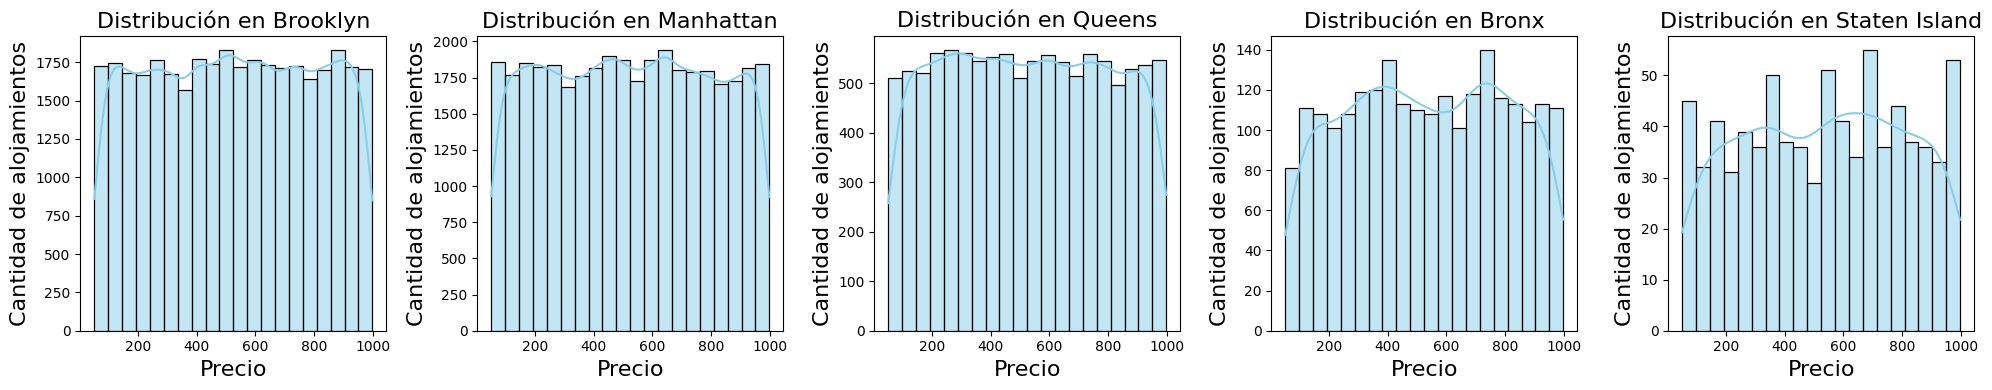

In [ ]:
# Barrios
barrios = df['neighbourhood group'].unique()
barrios = df[df['neighbourhood group'] != 'Unspecified']['neighbourhood group'].unique()

# Filas y columnas necesarias
n_barrios = len(barrios)
n_cols = 5
n_rows = np.ceil(n_barrios / n_cols).astype(int)

# Estética del Histograma
plt.figure(figsize=(n_cols * 4, n_rows * 4))
for i, barrio in enumerate(barrios, 1):
    plt.subplot(n_rows, n_cols, i)  # Subgráficos dinámicamente

    # Filtro para no incluir 'Unspecified'
    data_to_plot = df[(df['neighbourhood group'] == barrio) & (df['price'] != 'Unspecified')]['price'].astype(float)

    sns.histplot(data_to_plot, kde=True, bins=20, color="skyblue", edgecolor="black")
    plt.title(f'Distribución en {barrio}', fontsize=16)
    plt.xlabel('Precio', fontsize=16)
    plt.ylabel('Cantidad de alojamientos', fontsize=16)

# Grid y estilo

plt.tight_layout()
plt.show()



*Para analizar la distribución de los precios de los alojamientos por barrio, se crearon histogramas utilizando la función sns.histplot() de la librería Seaborn. Los precios fueron agrupados por barrio (excluyendo "Unspecified") y se visualizó la distribución de precios en cada uno.*

Para mejorar la claridad del gráfico, se utilizaron colores suaves (como el azul cielo) y bordes negros en las barras. Además, se incluyó una línea de densidad (kde) para observar la forma de la distribución. La estética de la visualización se adaptó a una cuadrícula dinámica que permite mostrar cada barrio en un subgráfico, de modo que la comparación entre ellos sea más clara.*

*Este tipo de visualización permite identificar patrones de precios y variaciones en los diferentes barrios.*

# **Relación entre Precio y Número de Reseñas**

Gráfico de dispersión → ***¿Que relacion hay entre el precio y el número de reseñas?***

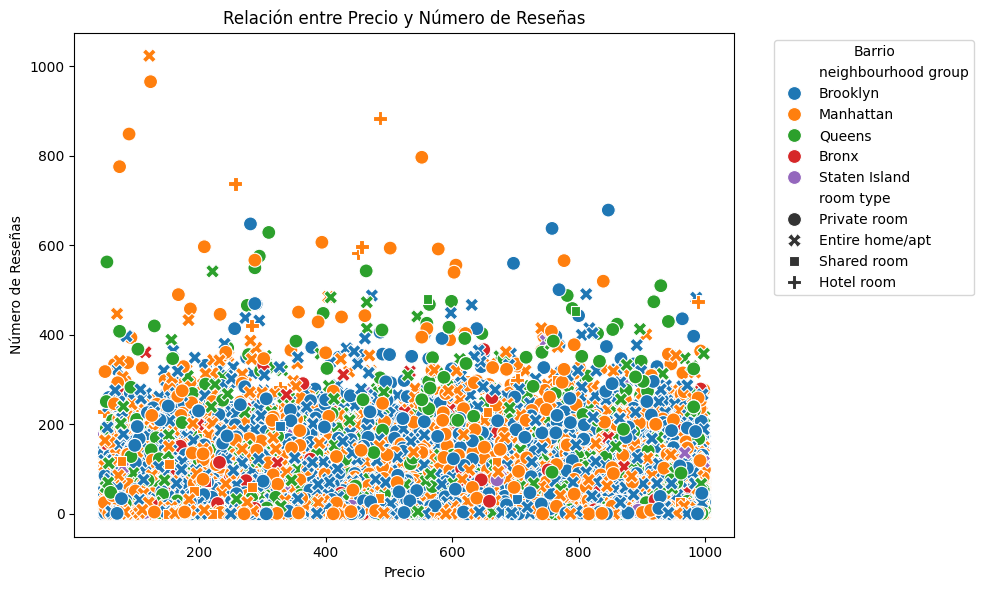

In [ ]:
# Ajuste del DataFrame
df = df[df['price'] != 'Unspecified']
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df[df['neighbourhood group'] != 'Unspecified']

# Estética del Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='number of reviews', hue='neighbourhood group', style='room type', s=100)

# Grid y estilo
plt.title('Relación entre Precio y Número de Reseñas')
plt.xlabel('Precio')
plt.ylabel('Número de Reseñas')
plt.legend(title='Barrio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


*Para examinar la relación entre el precio de los alojamientos y el número de reseñas, se utilizó un gráfico de dispersión con la función sns.scatterplot(). En este gráfico, el eje x representa el precio, mientras que el eje y muestra el número de reseñas.*

Los puntos fueron coloreados según el barrio y diferenciados por el tipo de habitación.*

*La visualización permite observar cómo varía el número de reseñas en función del precio, lo que podría ayudar a identificar si los alojamientos más caros tienen más o menos reseñas. Se añadió una leyenda para identificar fácilmente los barrios y los tipos de habitación, y se incluyó una cuadrícula para facilitar la comparación visual.*

# **Evolución Mensual de Reseñas y Precios a lo Largo del Año**

Gráfico de líneas → ***¿Como se distribuyen las reseñas y el precio a lo largo del año?***

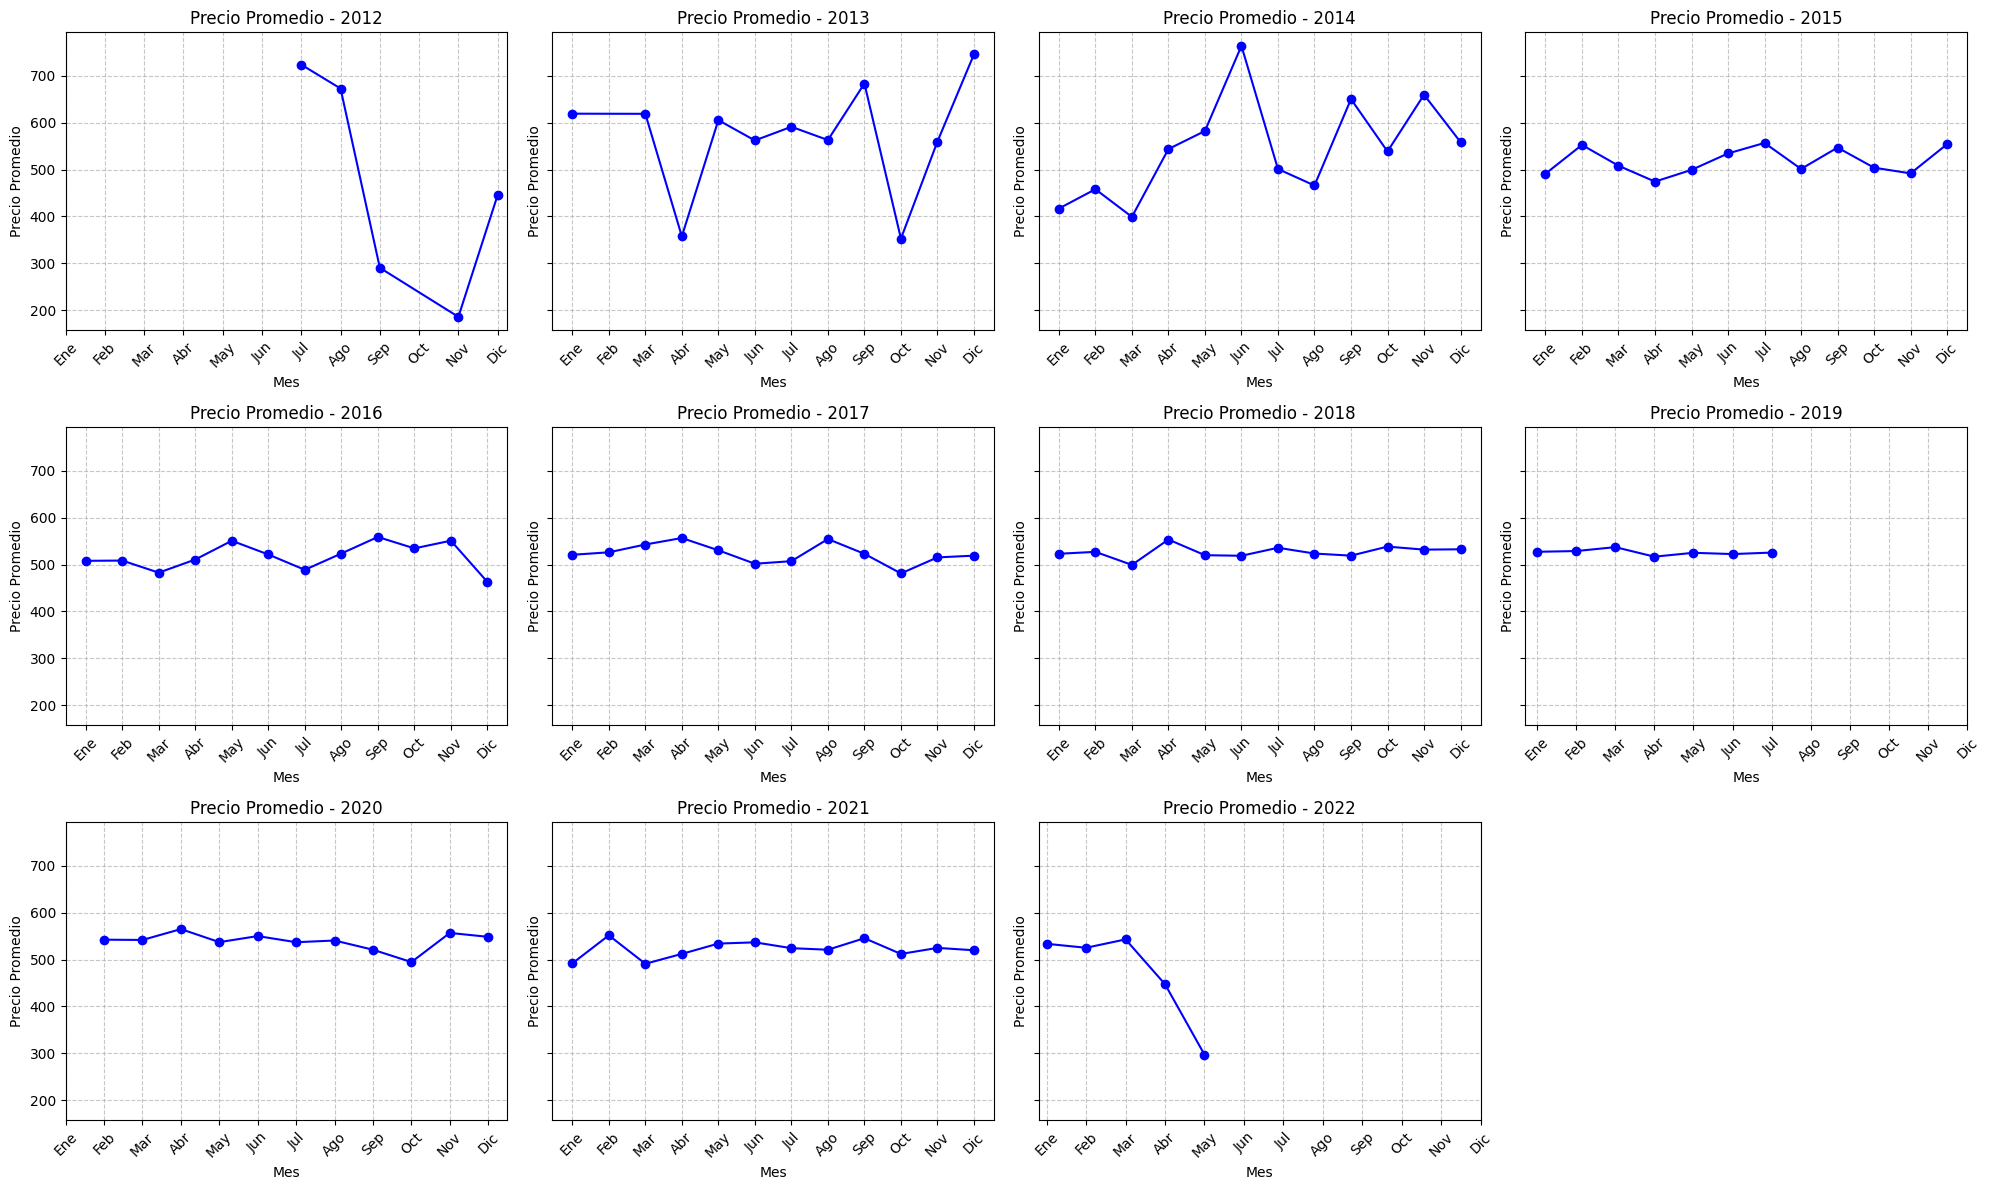

In [ ]:
# Ajuste del DataFrame
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
df['year'] = df['last review'].dt.year
df['month'] = df['last review'].dt.month

# Lista de los años que se Visualizaran
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Grilla para subplots
n_cols = 4
n_rows = math.ceil(len(years) / n_cols)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 4), sharey=True)

axes = axes.flatten()

# Precio Promedio por mes
for i, year in enumerate(years):
    ax = axes[i]
    df_year = df[df['year'] == year]

    monthly_avg = df_year.groupby('month').agg({'price': 'mean'}).reset_index()

    ax.plot(monthly_avg['month'], monthly_avg['price'], marker='o', color='blue')
    ax.set_title(f'Precio Promedio - {year}')
    ax.set_xlabel('Mes')
    ax.set_ylabel('Precio Promedio')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)
    ax.grid(True, linestyle='--', alpha=0.7)

# Eliminar ejes vacíos si hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Grid y estilo
plt.tight_layout()
plt.show()


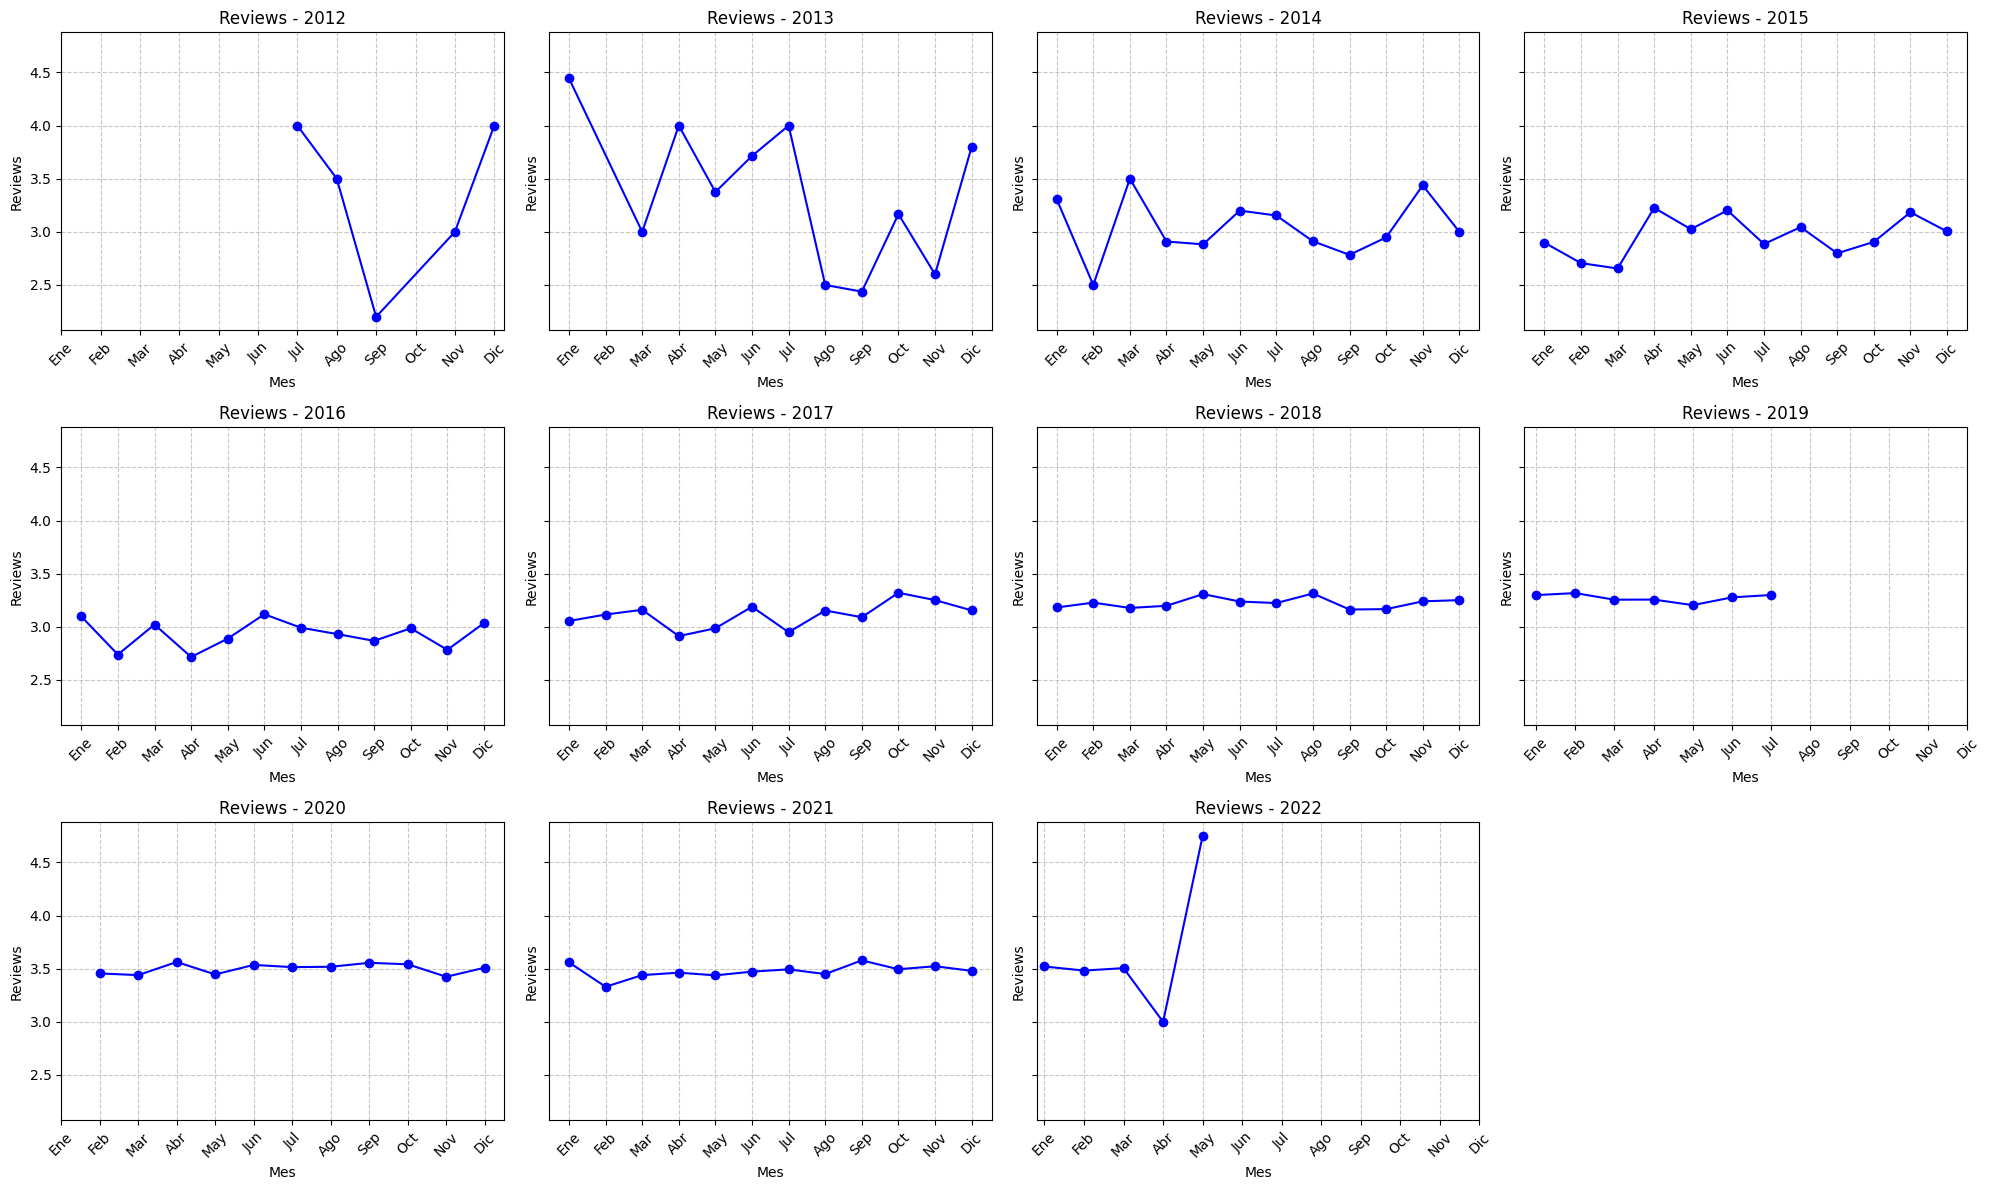

In [8]:
# Ajuste del DataFrame
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
df['year'] = df['last review'].dt.year
df['month'] = df['last review'].dt.month

# Lista de los años que se Visualizaran
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Grilla para subplots
n_cols = 4
n_rows = math.ceil(len(years) / n_cols)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 4), sharey=True)

axes = axes.flatten()

# Reviews por mes
for i, year in enumerate(years):
    ax = axes[i]
    df_year = df[df['year'] == year]

    monthly_avg = df_year.groupby('month').agg({'review rate number': 'mean'}).reset_index()

    ax.plot(monthly_avg['month'], monthly_avg['review rate number'], marker='o', color='blue')
    ax.set_title(f'Reviews - {year}')
    ax.set_xlabel('Mes')
    ax.set_ylabel('Reviews')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)
    ax.grid(True, linestyle='--', alpha=0.7)

# Eliminar ejes vacíos si hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Grid y estilo
plt.tight_layout()
plt.show()

*Para mostrar la evolución mensual de las reseñas y los precios a lo largo del año, se crearon gráficos de líneas utilizando ax.plot() en un formato de subgráficos. Cada gráfico representa un año específico, y muestra cómo varía el precio promedio y la cantidad de reseñas a lo largo de los meses.*

*Se utilizaron diferentes colores para los gráficos de precios (azul) y reseñas (verde). Los ejes x representaron los meses del año, y los valores fueron etiquetados con los nombres abreviados de los meses.*

*La visualización fue diseñada para facilitar la comparación entre los años y observar tendencias estacionales en los precios y las reseñas, lo que podría ayudar a identificar los mejores y peores meses para los alojamientos.*

# **Relación entre Tipo de Habitación y Precio**

Grafico de lineas →  ***¿Que barrio tiene las mejores reseñas y en que mes?***

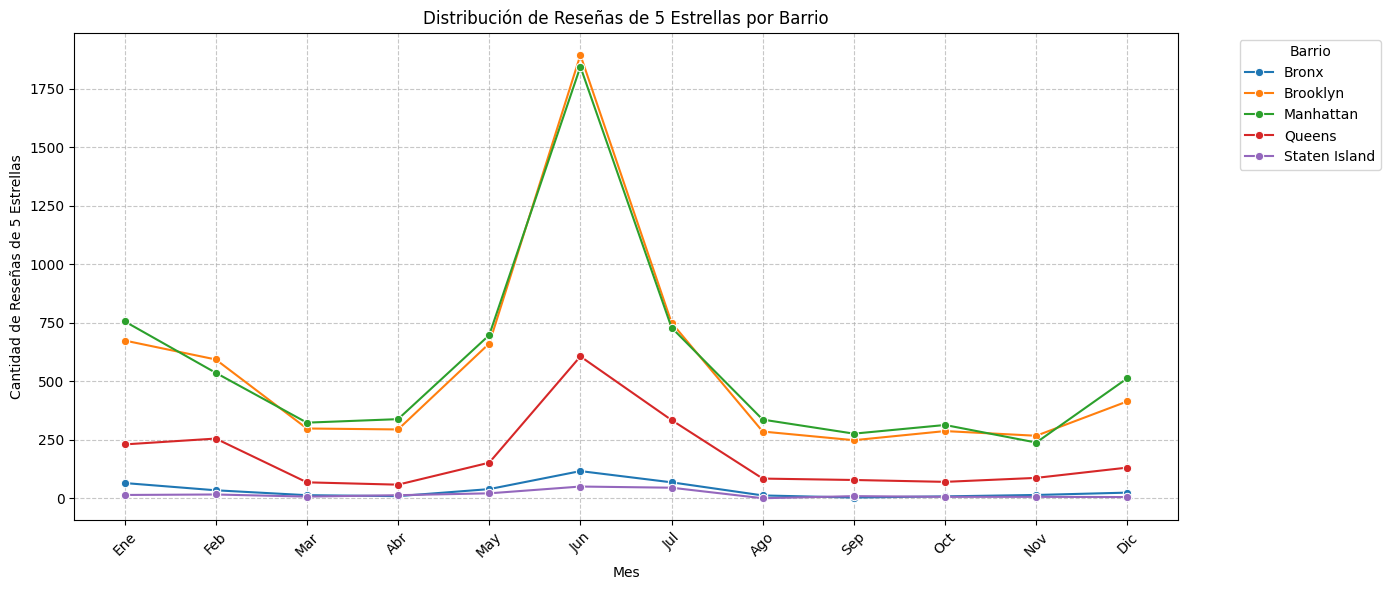

In [ ]:
# Filtrar los datos para seleccionar solo las reseñas de 5 estrellas
df_5stars = df[df['review rate number'] == 5].copy()
df_5stars['month'] = df_5stars['last review'].dt.month
df_5stars_grouped = df_5stars.groupby(['neighbourhood group', 'month']).size().reset_index(name='count')

# Estetica del Gráfico de líneas
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_5stars_grouped, x='month', y='count', hue='neighbourhood group', marker='o')

# Grid y estilo
plt.title('Distribución de Reseñas de 5 Estrellas por Barrio')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Reseñas de 5 Estrellas')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)
plt.legend(title='Barrio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

*En este gráfico, se analizó la distribución de reseñas de 5 estrellas por barrio, agrupando los datos por barrio y mes. Se utilizó un gráfico de líneas con sns.lineplot() para representar la cantidad de reseñas de 5 estrellas en cada mes.*

*Los diferentes barrios fueron diferenciados por colores, lo que permitió identificar cuál barrio tenía más reseñas de 5 estrellas en determinados meses. La estética fue diseñada con marcadores para destacar los puntos de cada mes y una cuadrícula para facilitar la interpretación visual.*

*Este gráfico es útil para observar la popularidad de los barrios en cuanto a reseñas de alta calidad a lo largo del año.*